In [1]:
library(readr)
library(xts)
library(zoo)

d <- read_table(
  "data/m-3m4608.txt",
  col_types = cols(
    .default = col_double(),
    date = col_date(format = "%Y%m%d")
  )
)

mmm <- xts(log1p(d[["rtn"]]), d$date)
rm(d)

tclass(mmm) <- "yearmon"
ts.3m <- ts(coredata(mmm), start = c(1946, 2), frequency = 12)
ts.3mlogp <- ts(cumsum(ts.3m), start = c(1946, 2), frequency = 12)

c(mean = mean(ts.3m), sd = sd(ts.3m))

# mean0.0102994120244493 sd0.063719098418256

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




mean         sd 
0.01029941 0.06371910

In [2]:
Box.test(ts.3m, type = "Ljung", lag = 12)

# Box-Ljung test

# data:  ts.3m
# X-squared = 27.688, df = 12, p-value = 0.006143


	Box-Ljung test

data:  ts.3m
X-squared = 27.688, df = 12, p-value = 0.006143


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



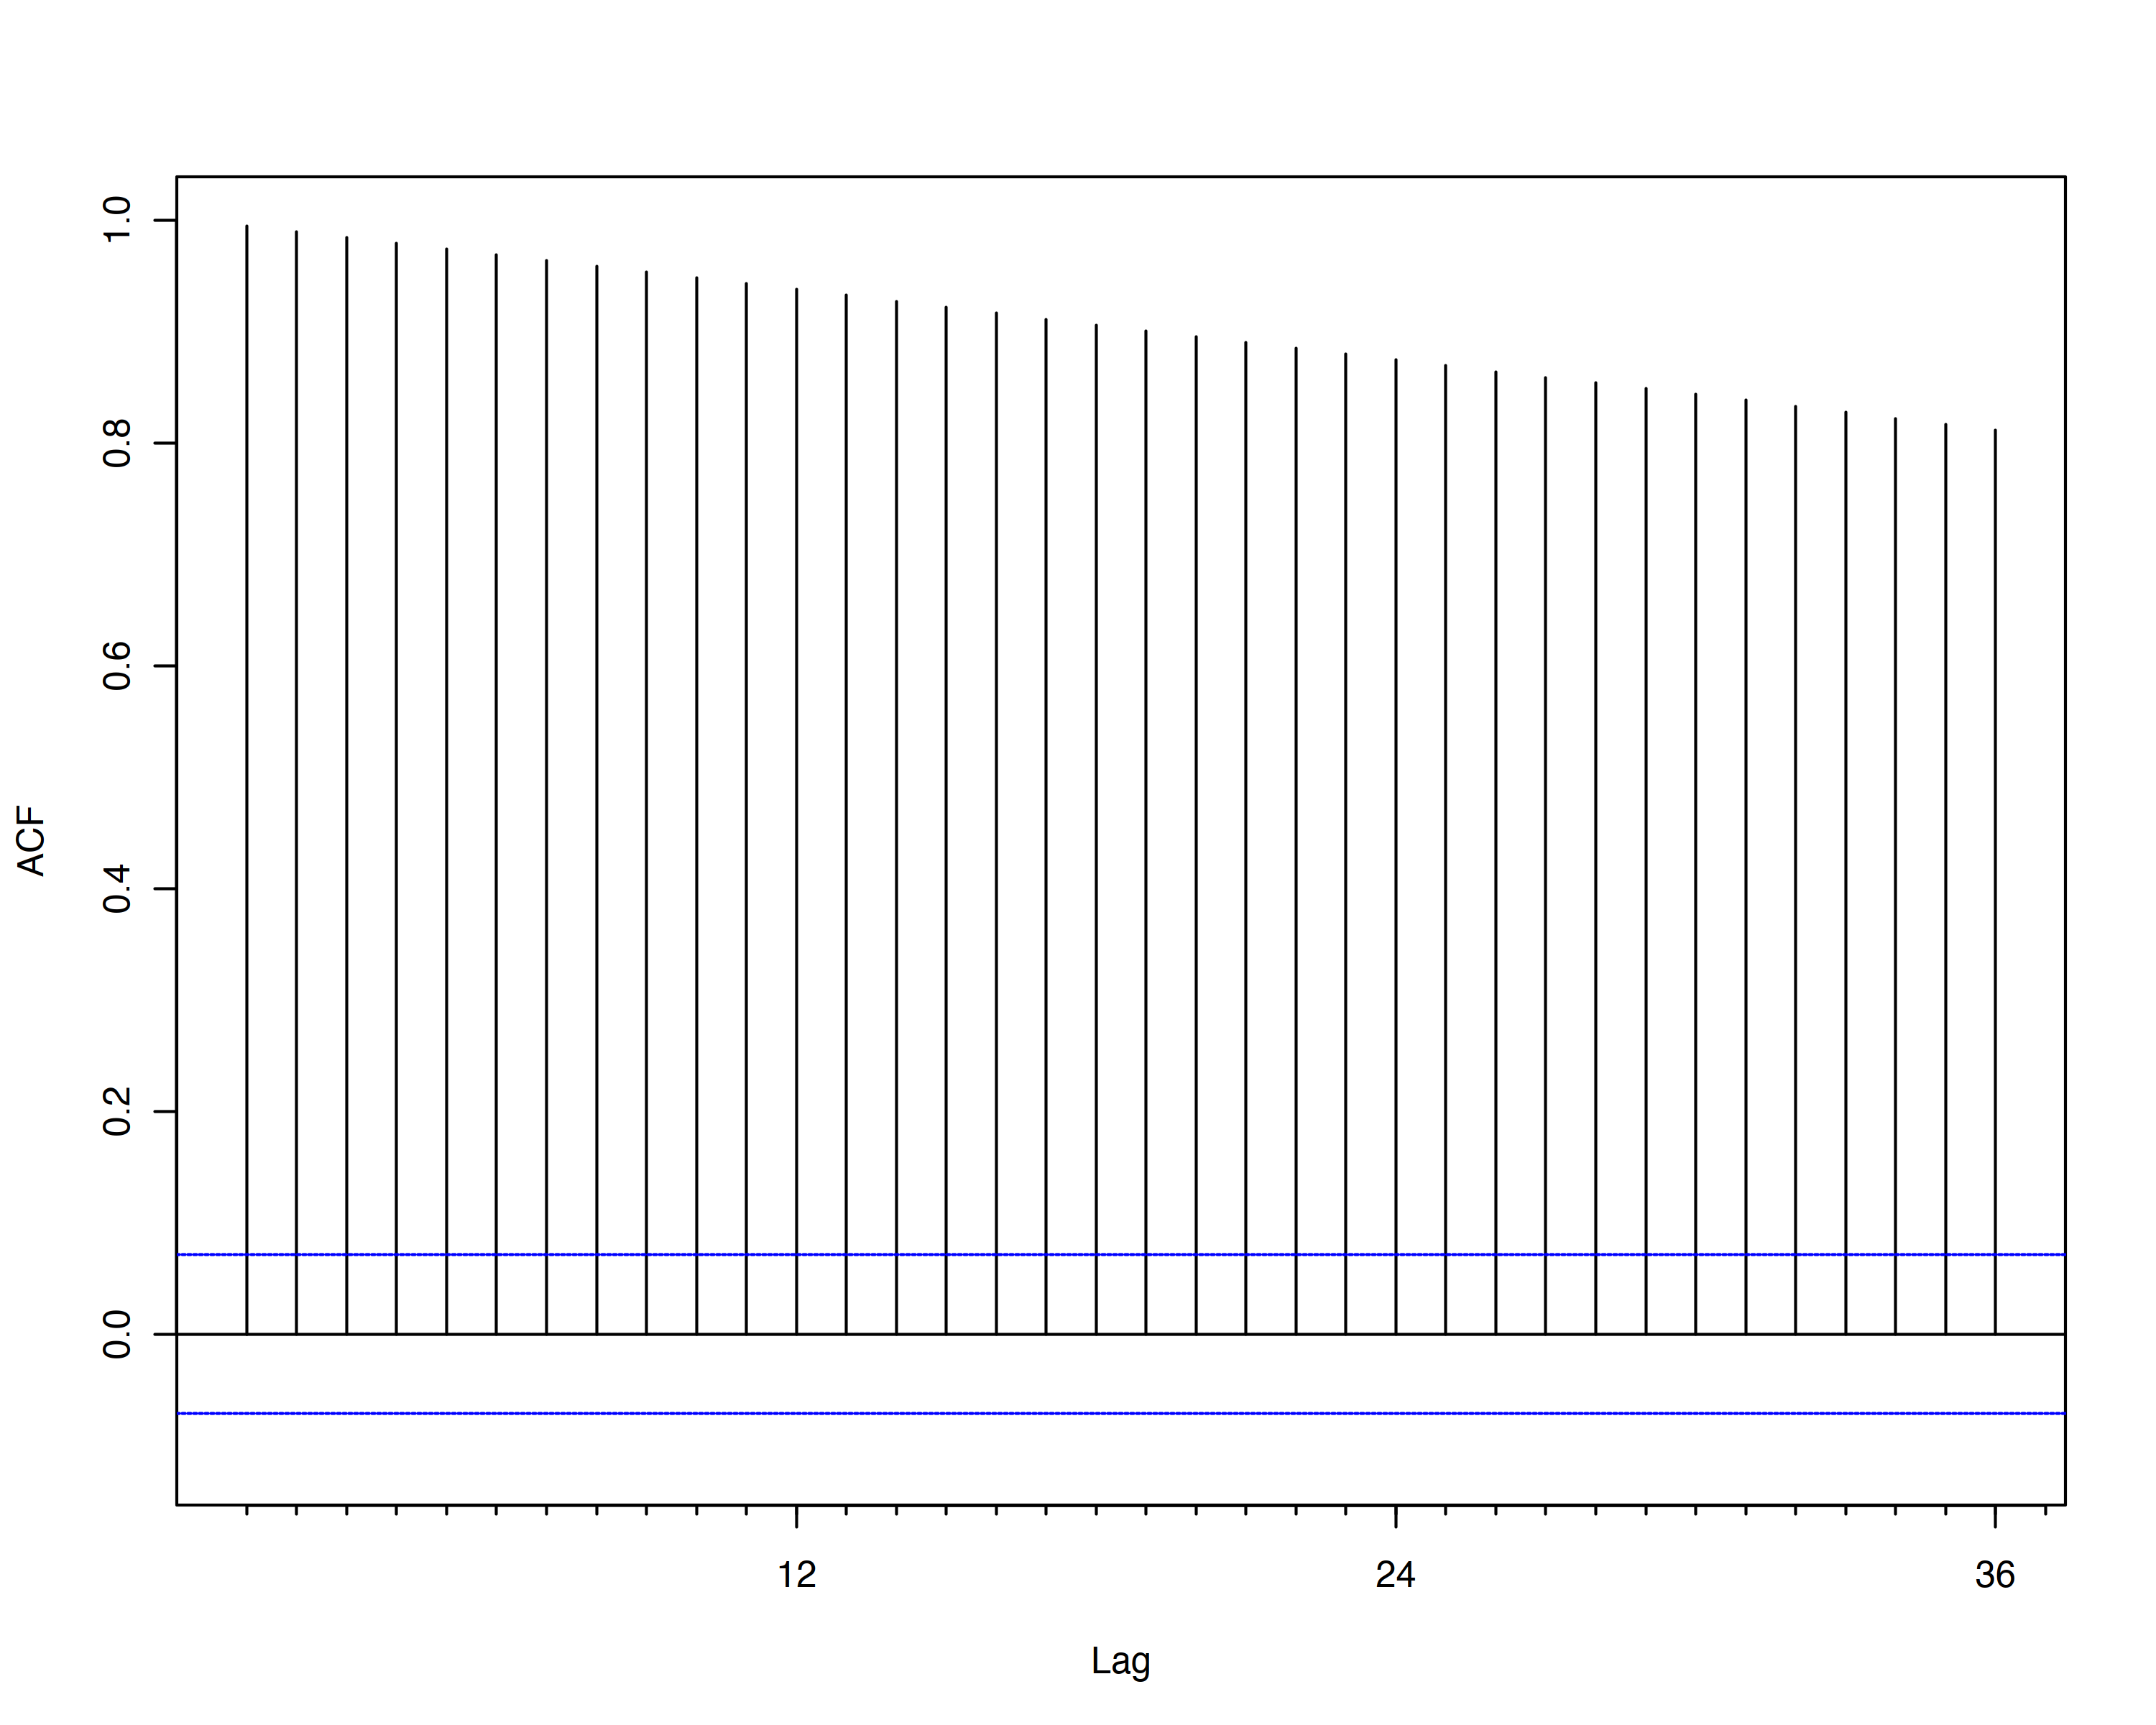

In [3]:
# 调整画布大小
options(repr.plot.width = 10, repr.plot.height = 8)
# 调整分辨率
options(repr.plot.res = 300)

forecast::Acf(ts.3mlogp, main = "", lag = 36)

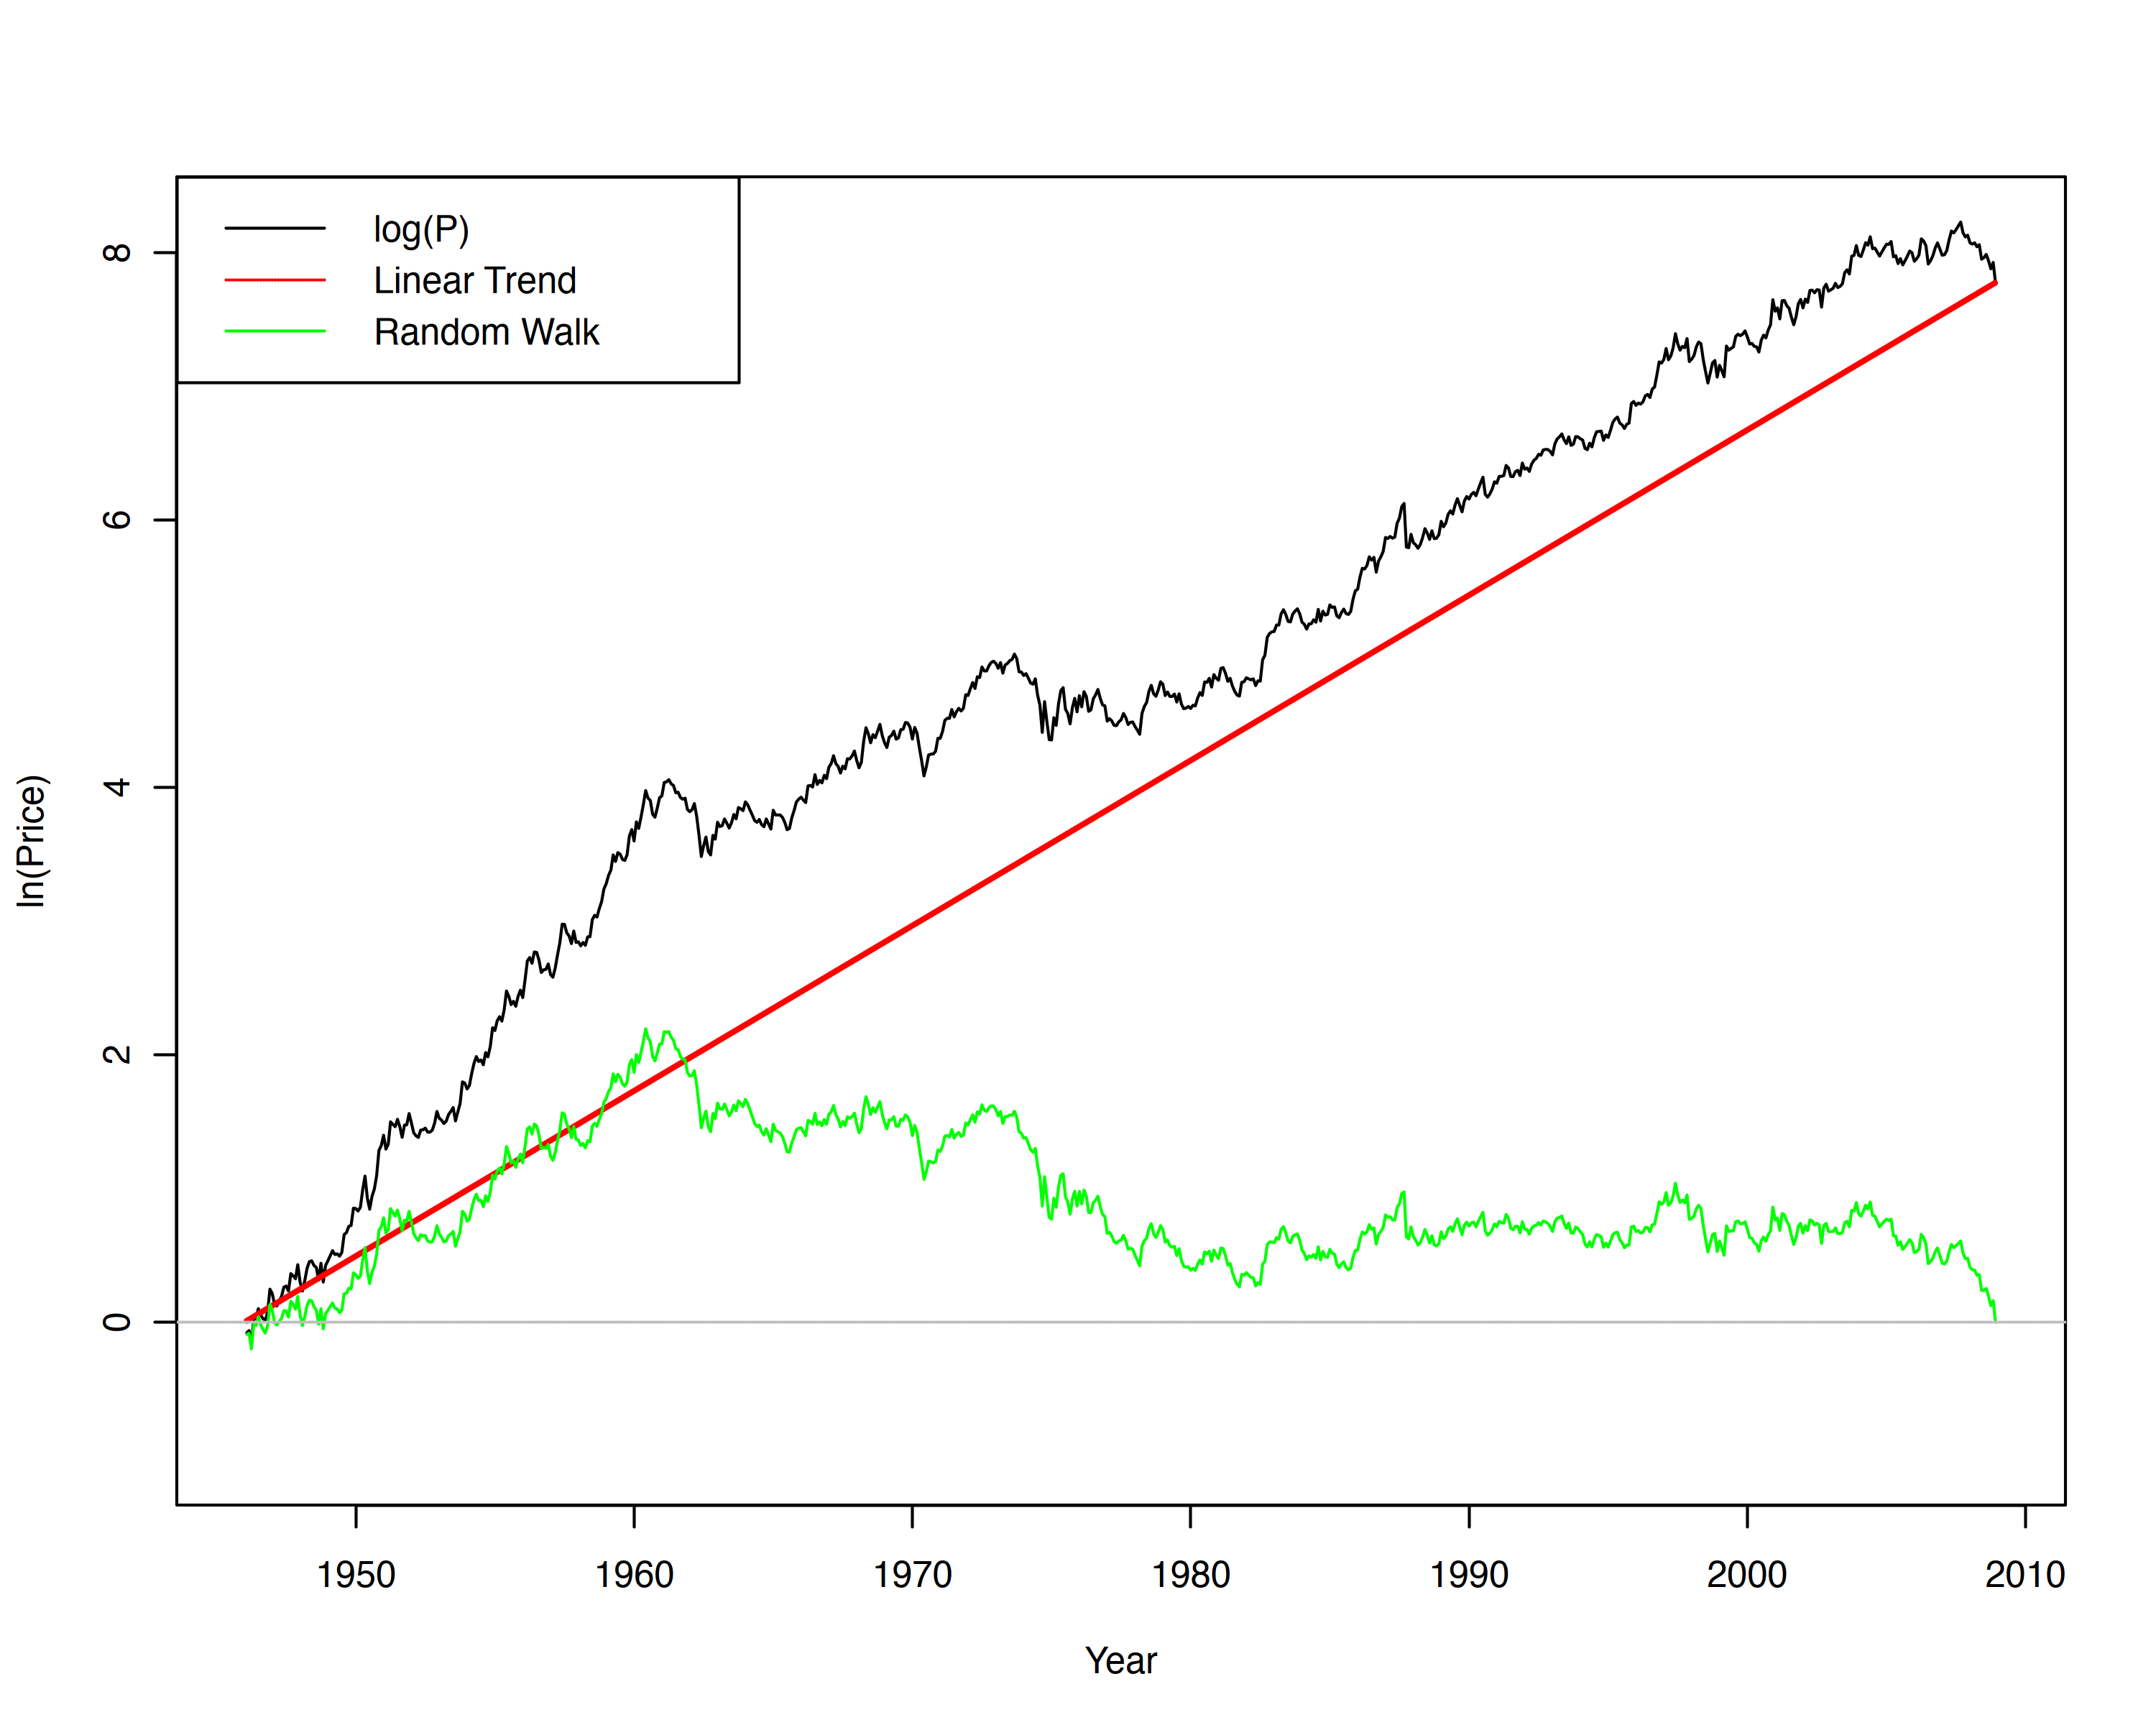

In [4]:
plot(
  c(time(ts.3mlogp)), c(ts.3mlogp),
  ylim = c(-1, 8.2), type = "l",
  xlab = "Year", ylab = "ln(Price)"
)

tmp.x <- seq_along(ts.3mlogp)
tmp.y <- 0.01030 * tmp.x
tmp.y2 <- c(ts.3mlogp) - tmp.y
tmp.y <- ts(tmp.y, start = c(1946, 2), frequency = 12)

lines(c(time(tmp.y)), c(tmp.y), col = "red", lwd = 2, lty = 3)
lines(c(time(tmp.y)), c(tmp.y2), col = "green")

legend(
  "topleft",
  lty = c(1, 3, 1), col = c("black", "red", "green"),
  legend = c("log(P)", "Linear Trend", "Random Walk")
)
abline(h = 0, col = "gray", lty = 3)

In [5]:
rm(tmp.x, tmp.y, tmp.y2)

In [6]:
da <- read_table(
  "data/q-gnp4710.txt",
  col_types = cols(.default = col_double())
)

gnp <- ts(
  log(da[["VALUE"]]),
  start = c(1947, 1),
  frequency = 4
)

dgnp <- diff(gnp)
rm(da)

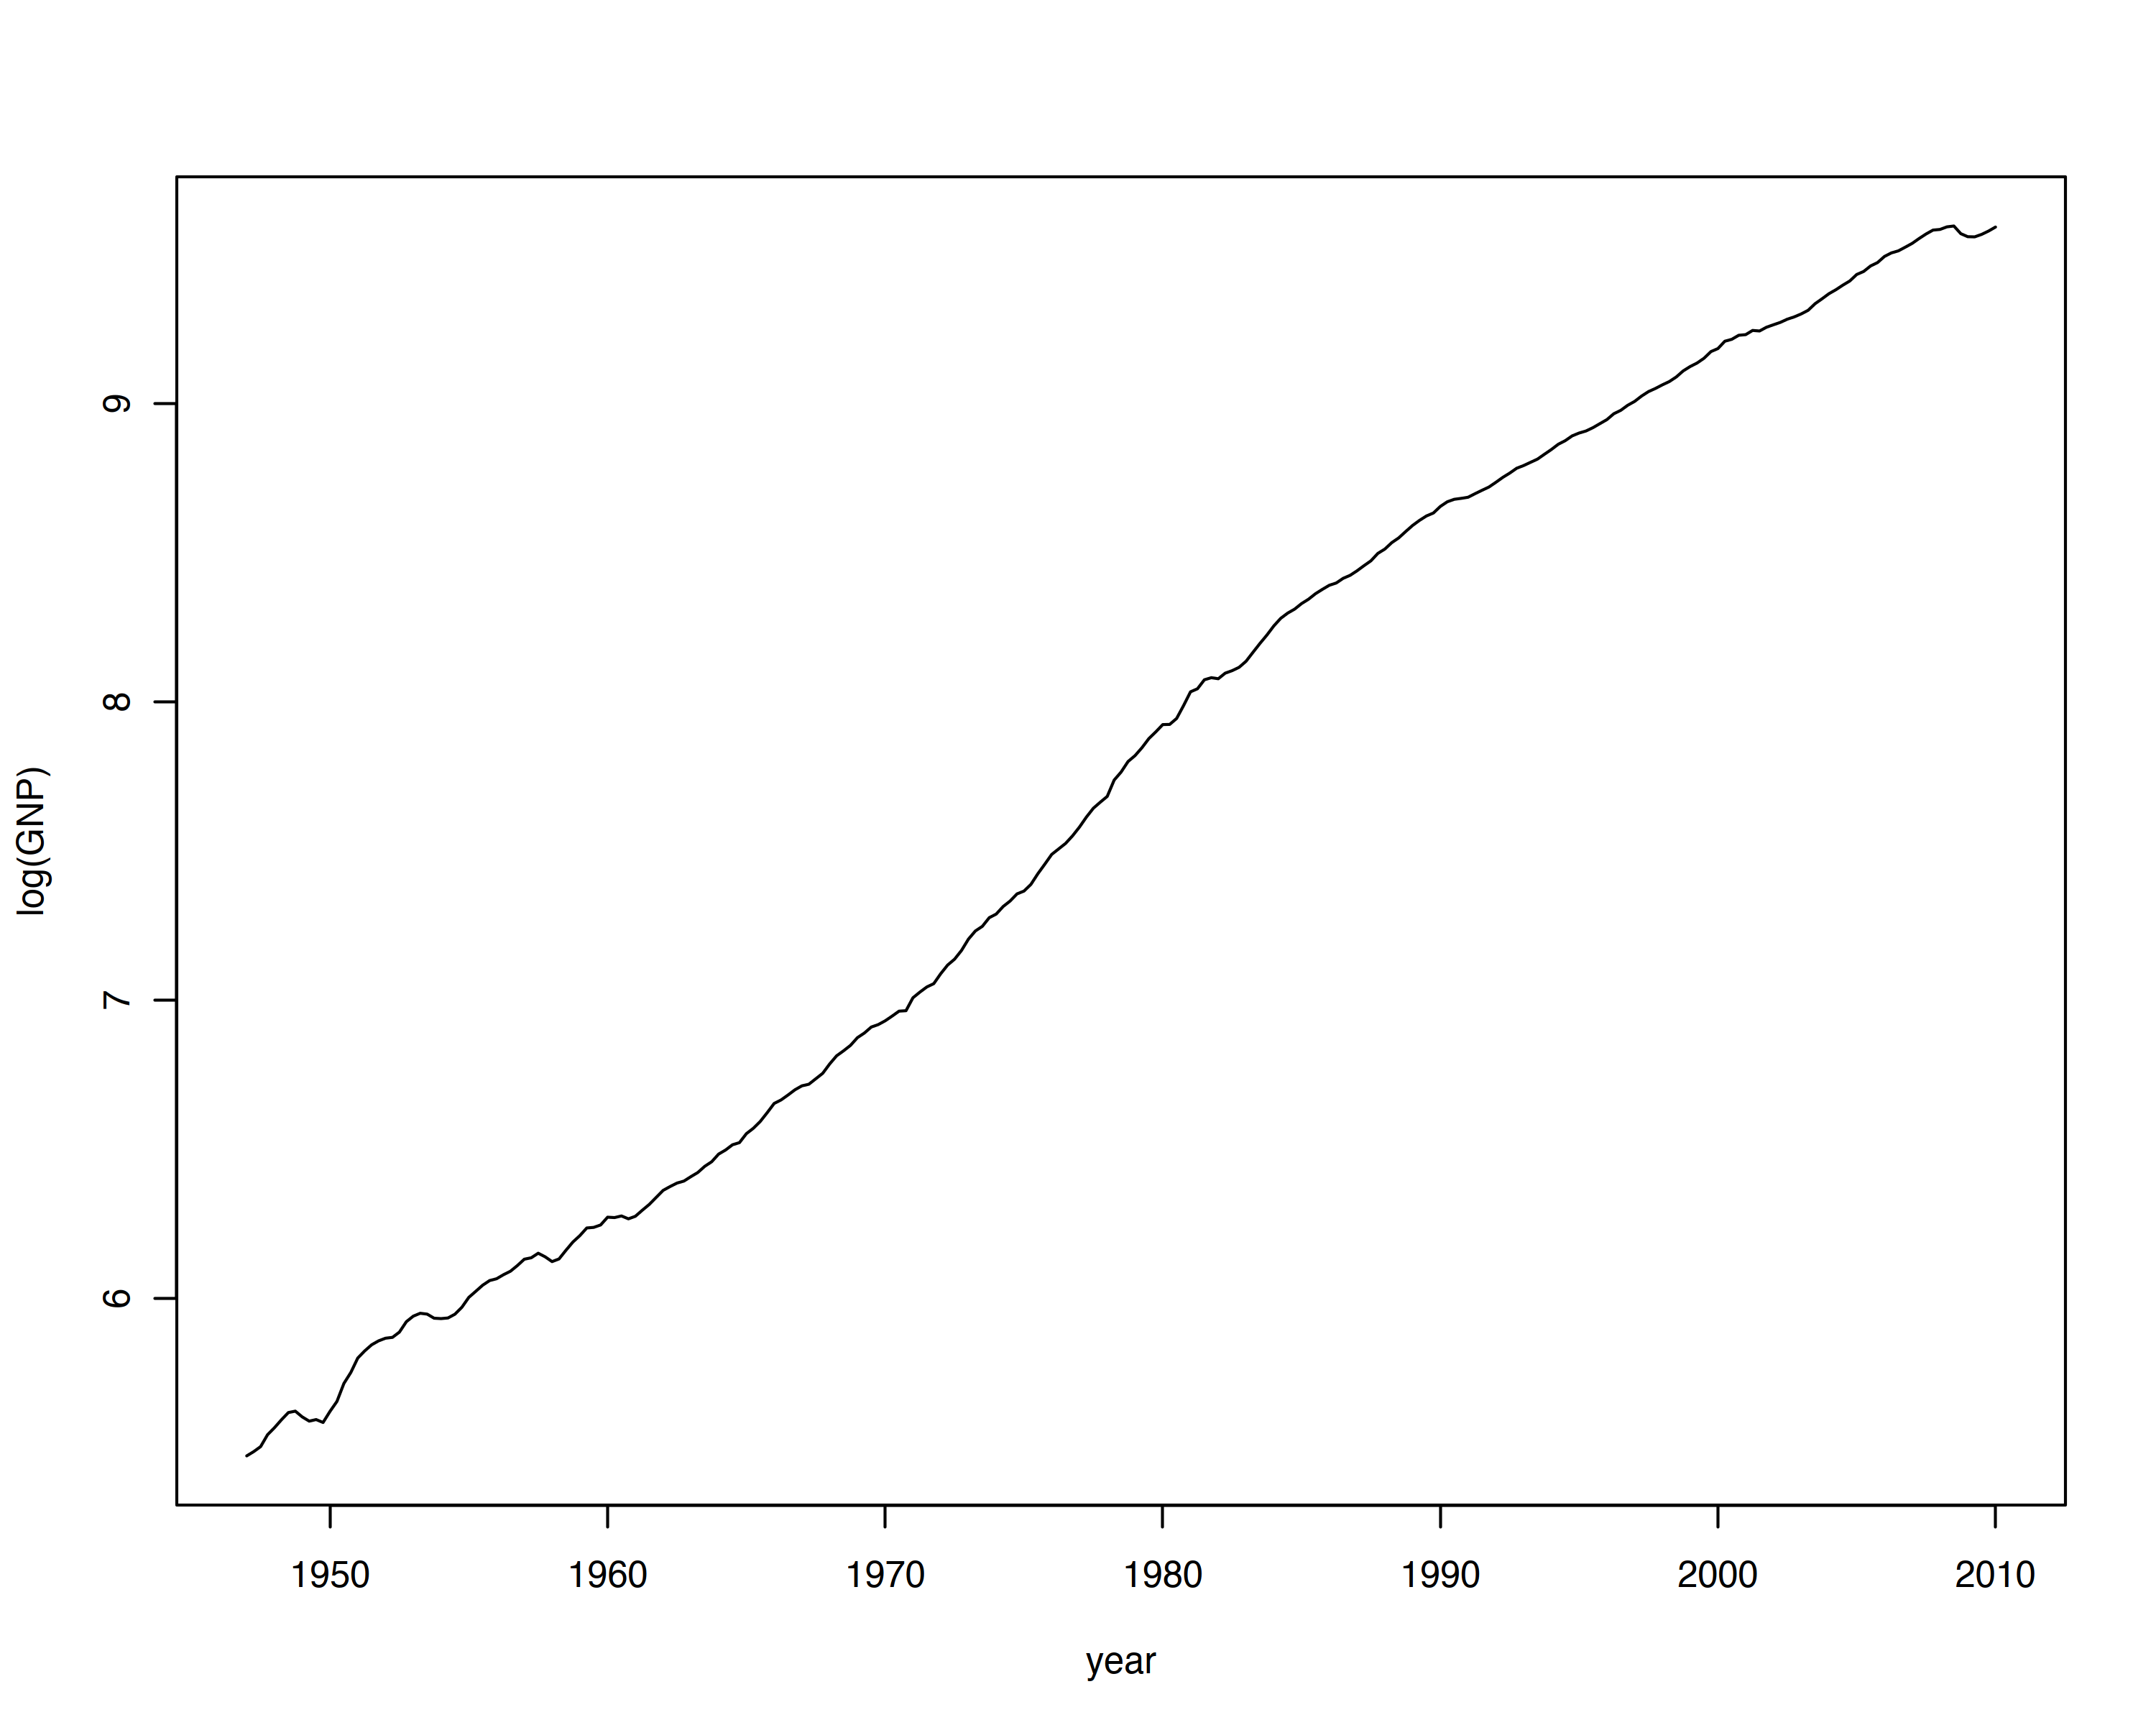

In [7]:
plot(gnp, xlab = "year", ylab = "log(GNP)")

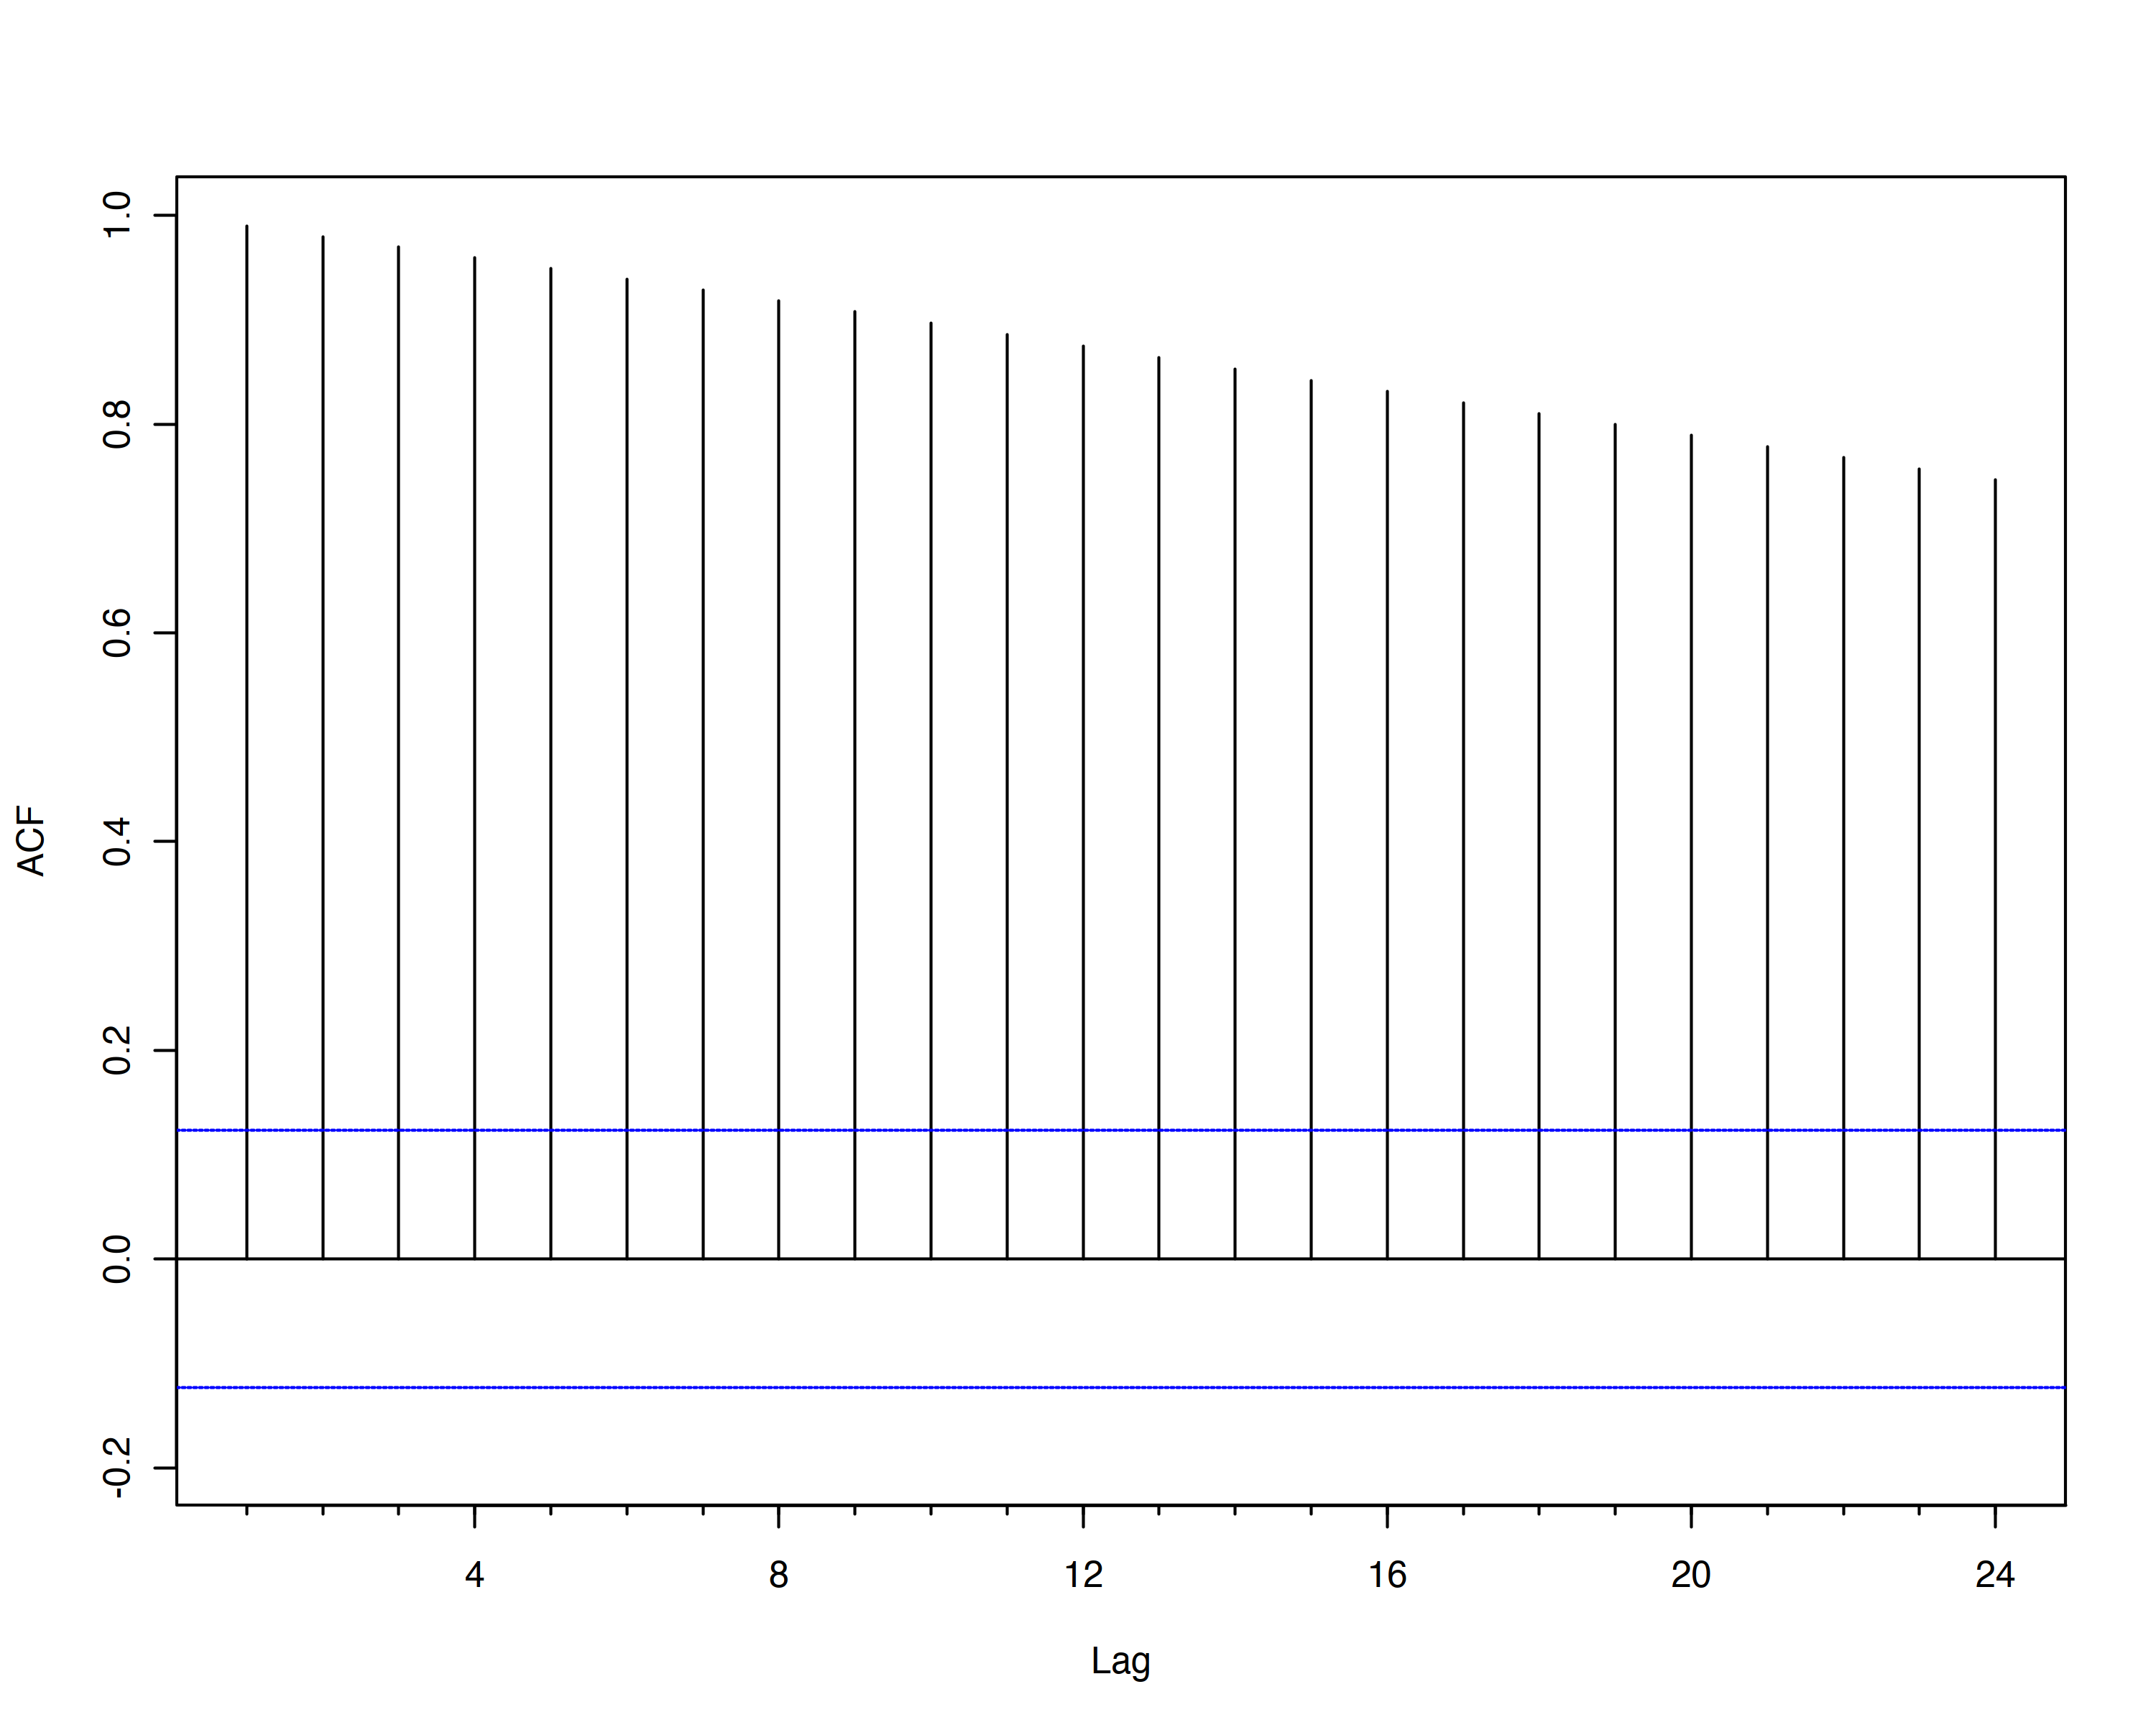

In [8]:
forecast::Acf(gnp, main = "")

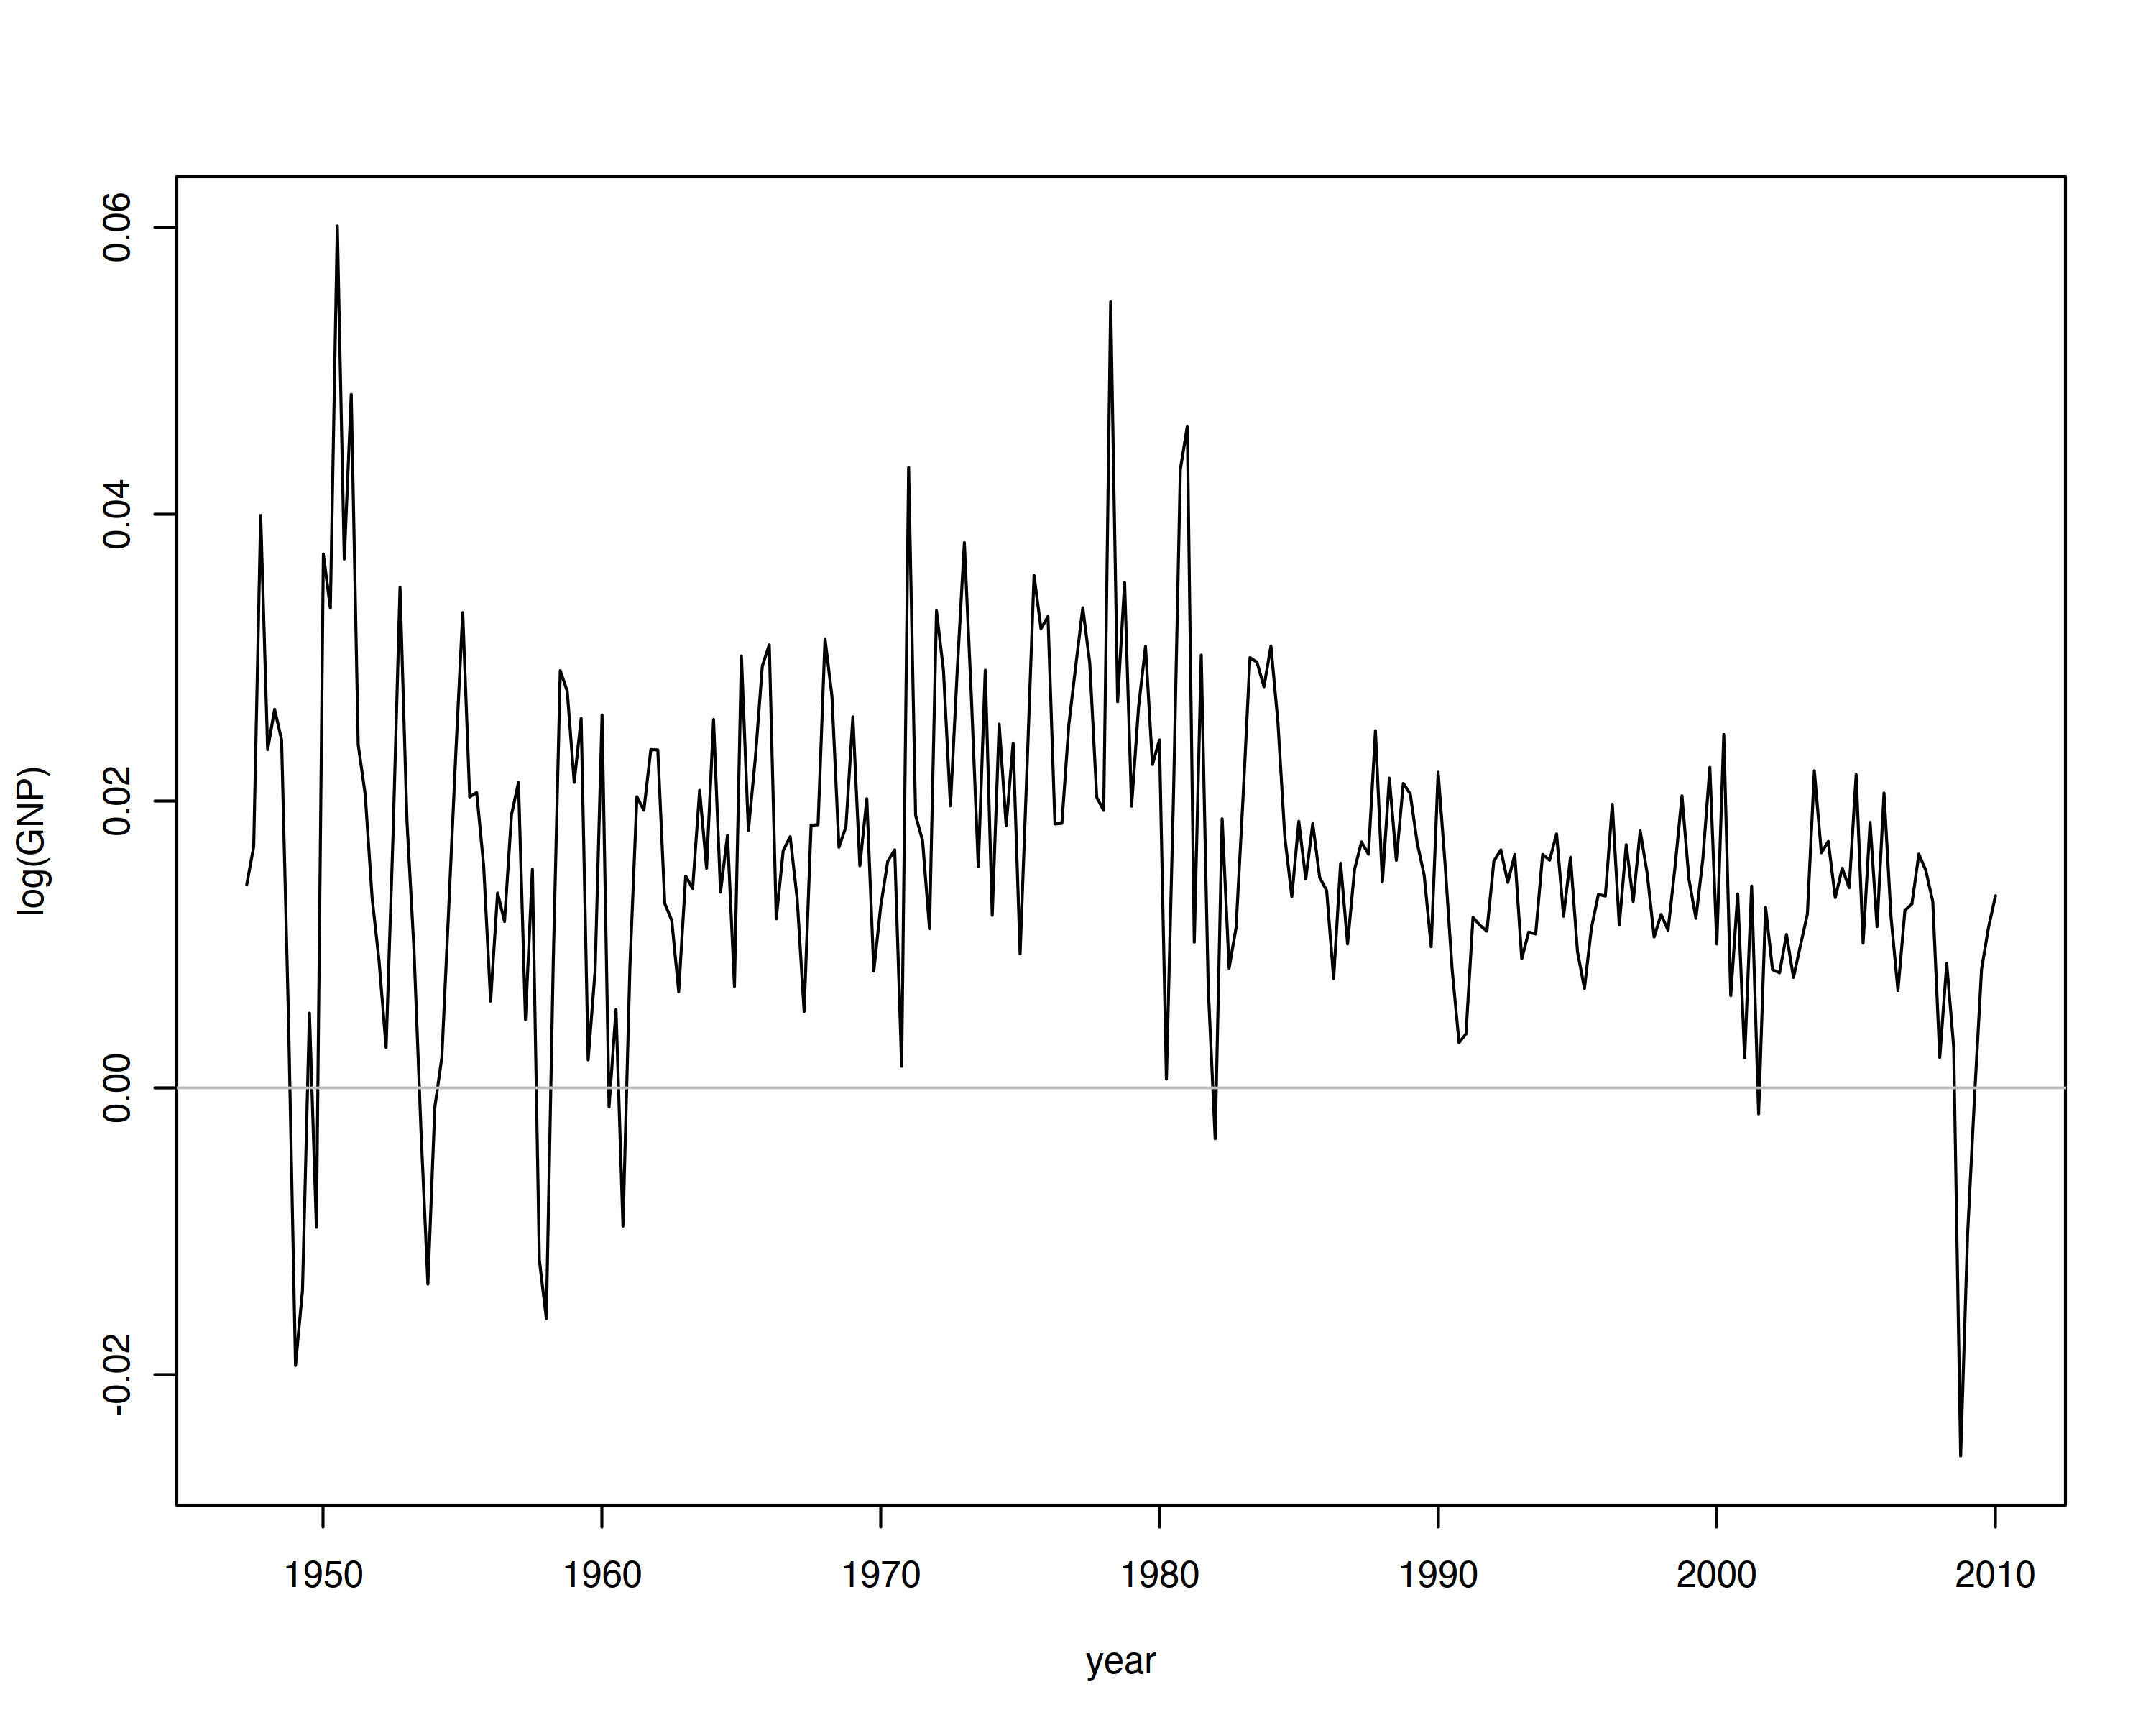

In [9]:
plot(
  dgnp,
  xlab = "year",
  ylab = "log(GNP)"
)
abline(h = 0, col = "gray", lty = 3)

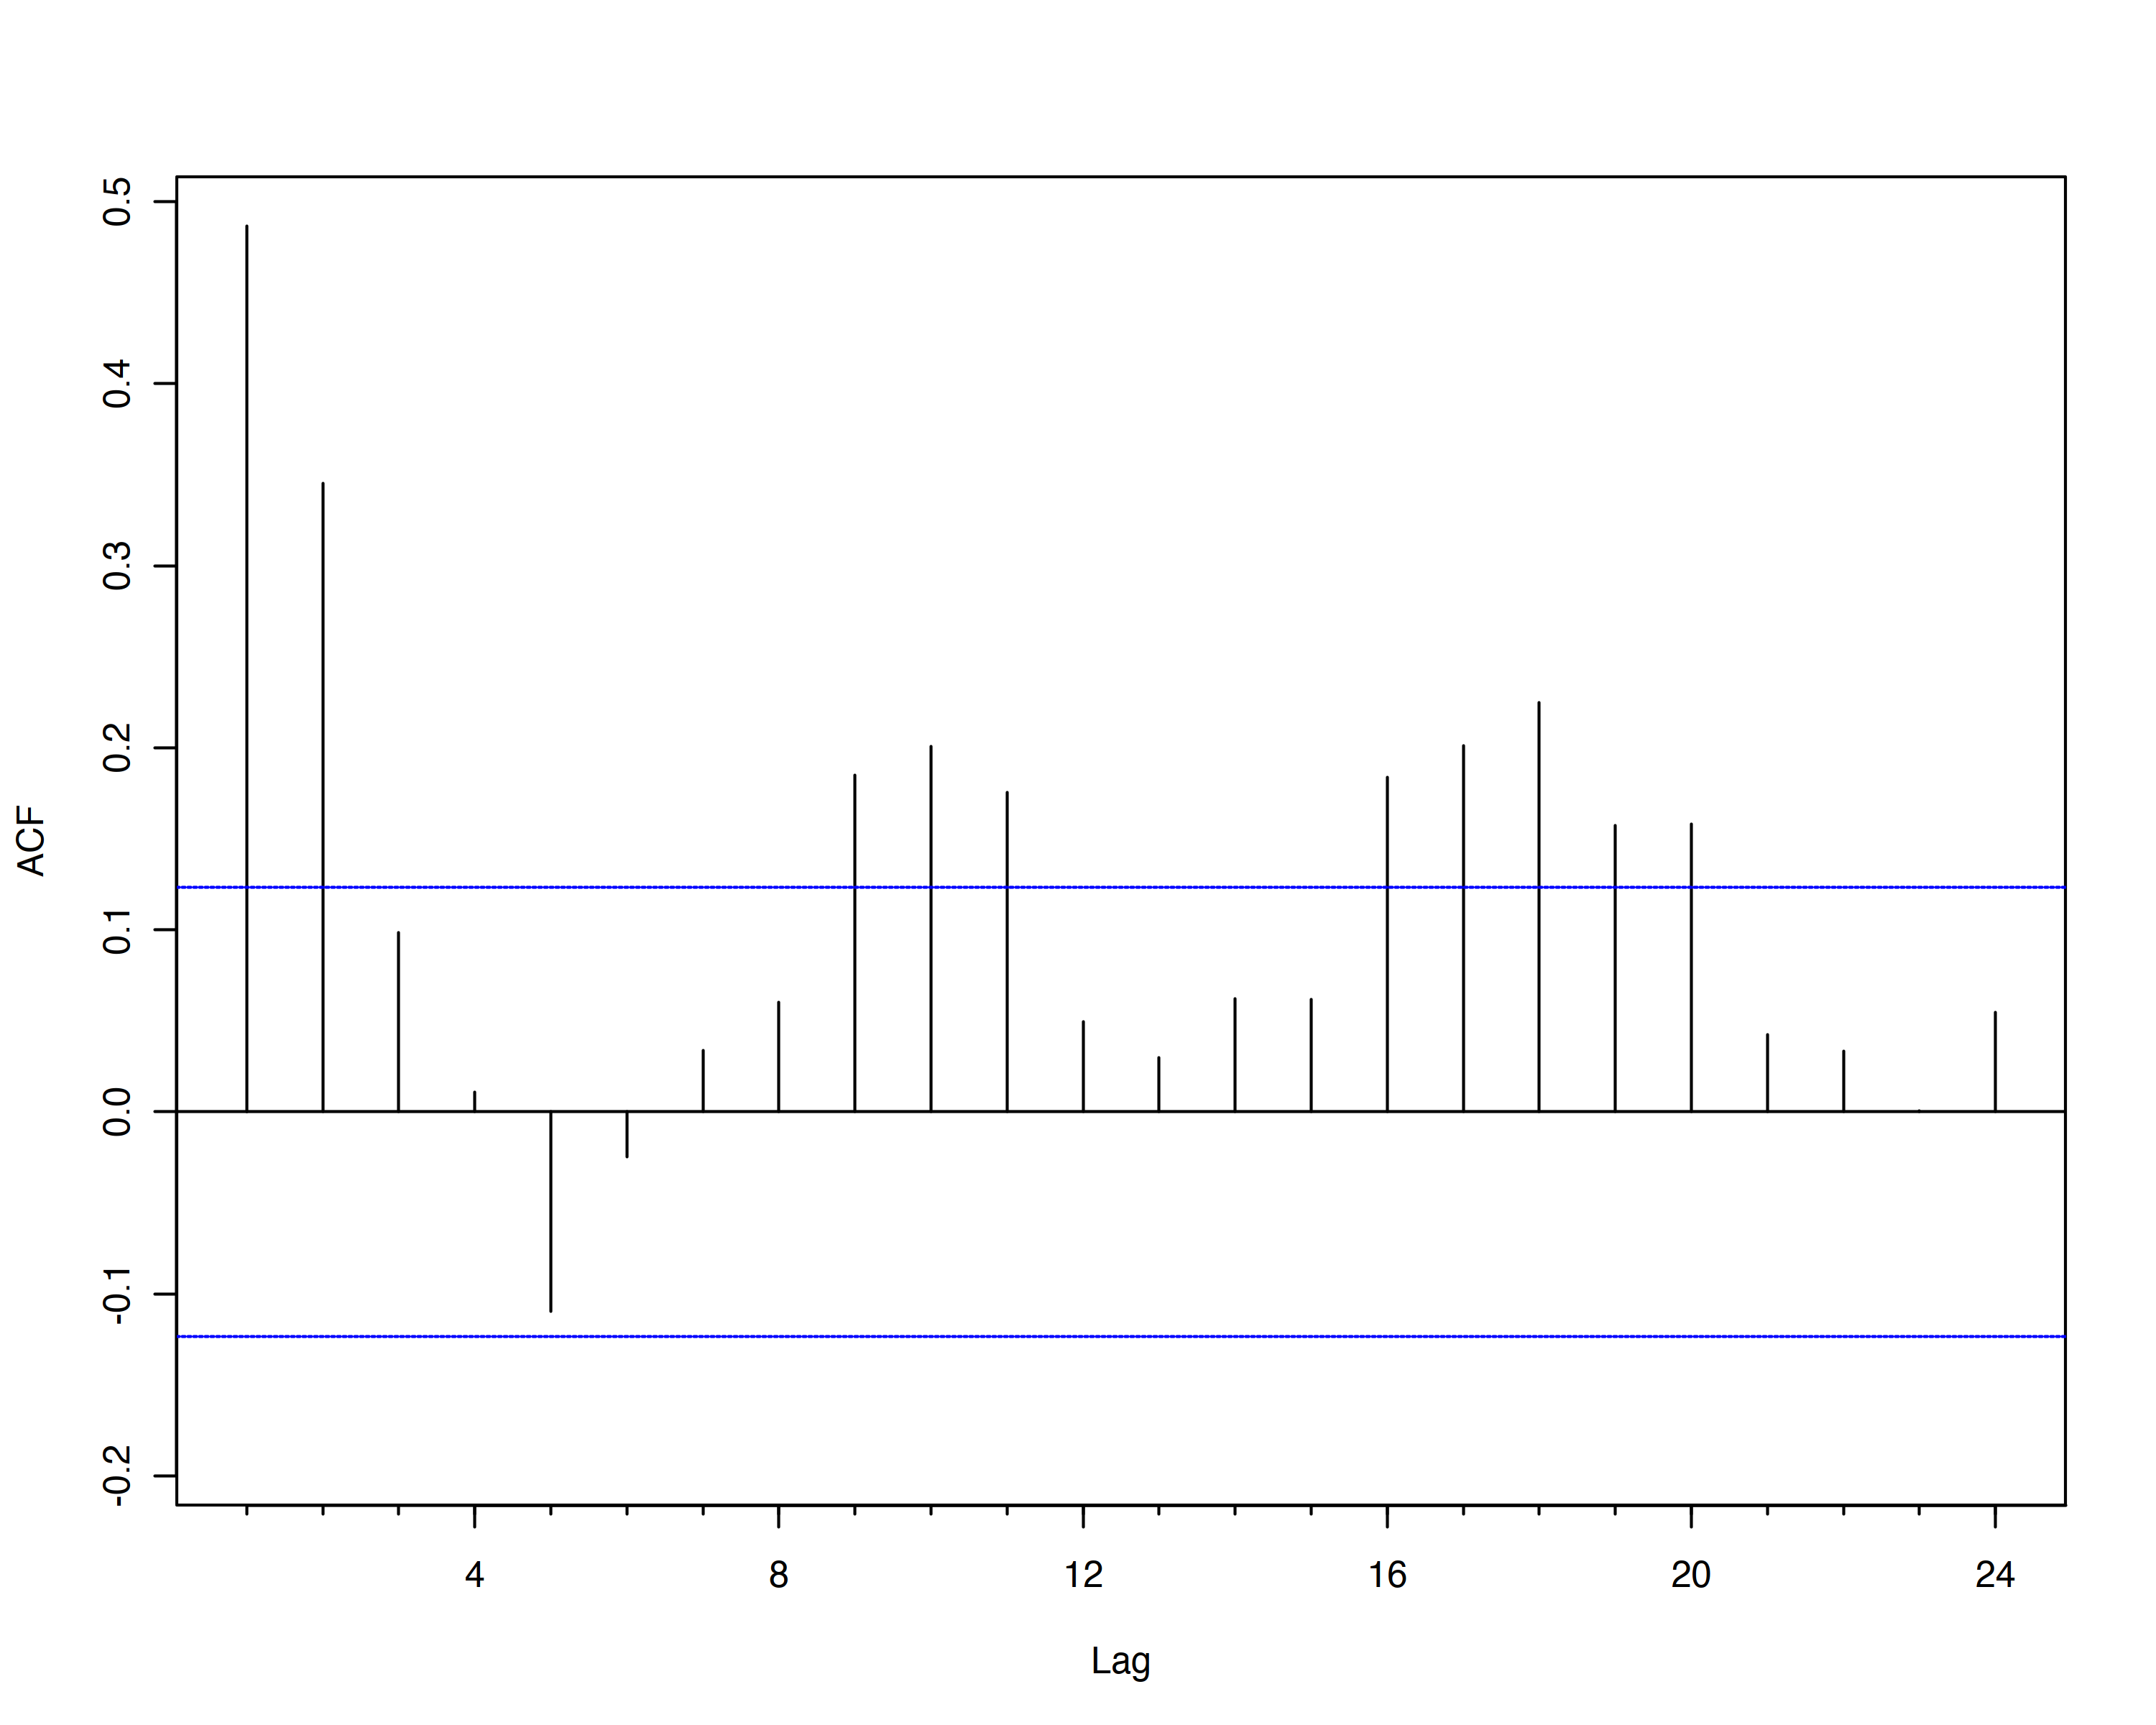

In [10]:
forecast::Acf(dgnp, main = "")

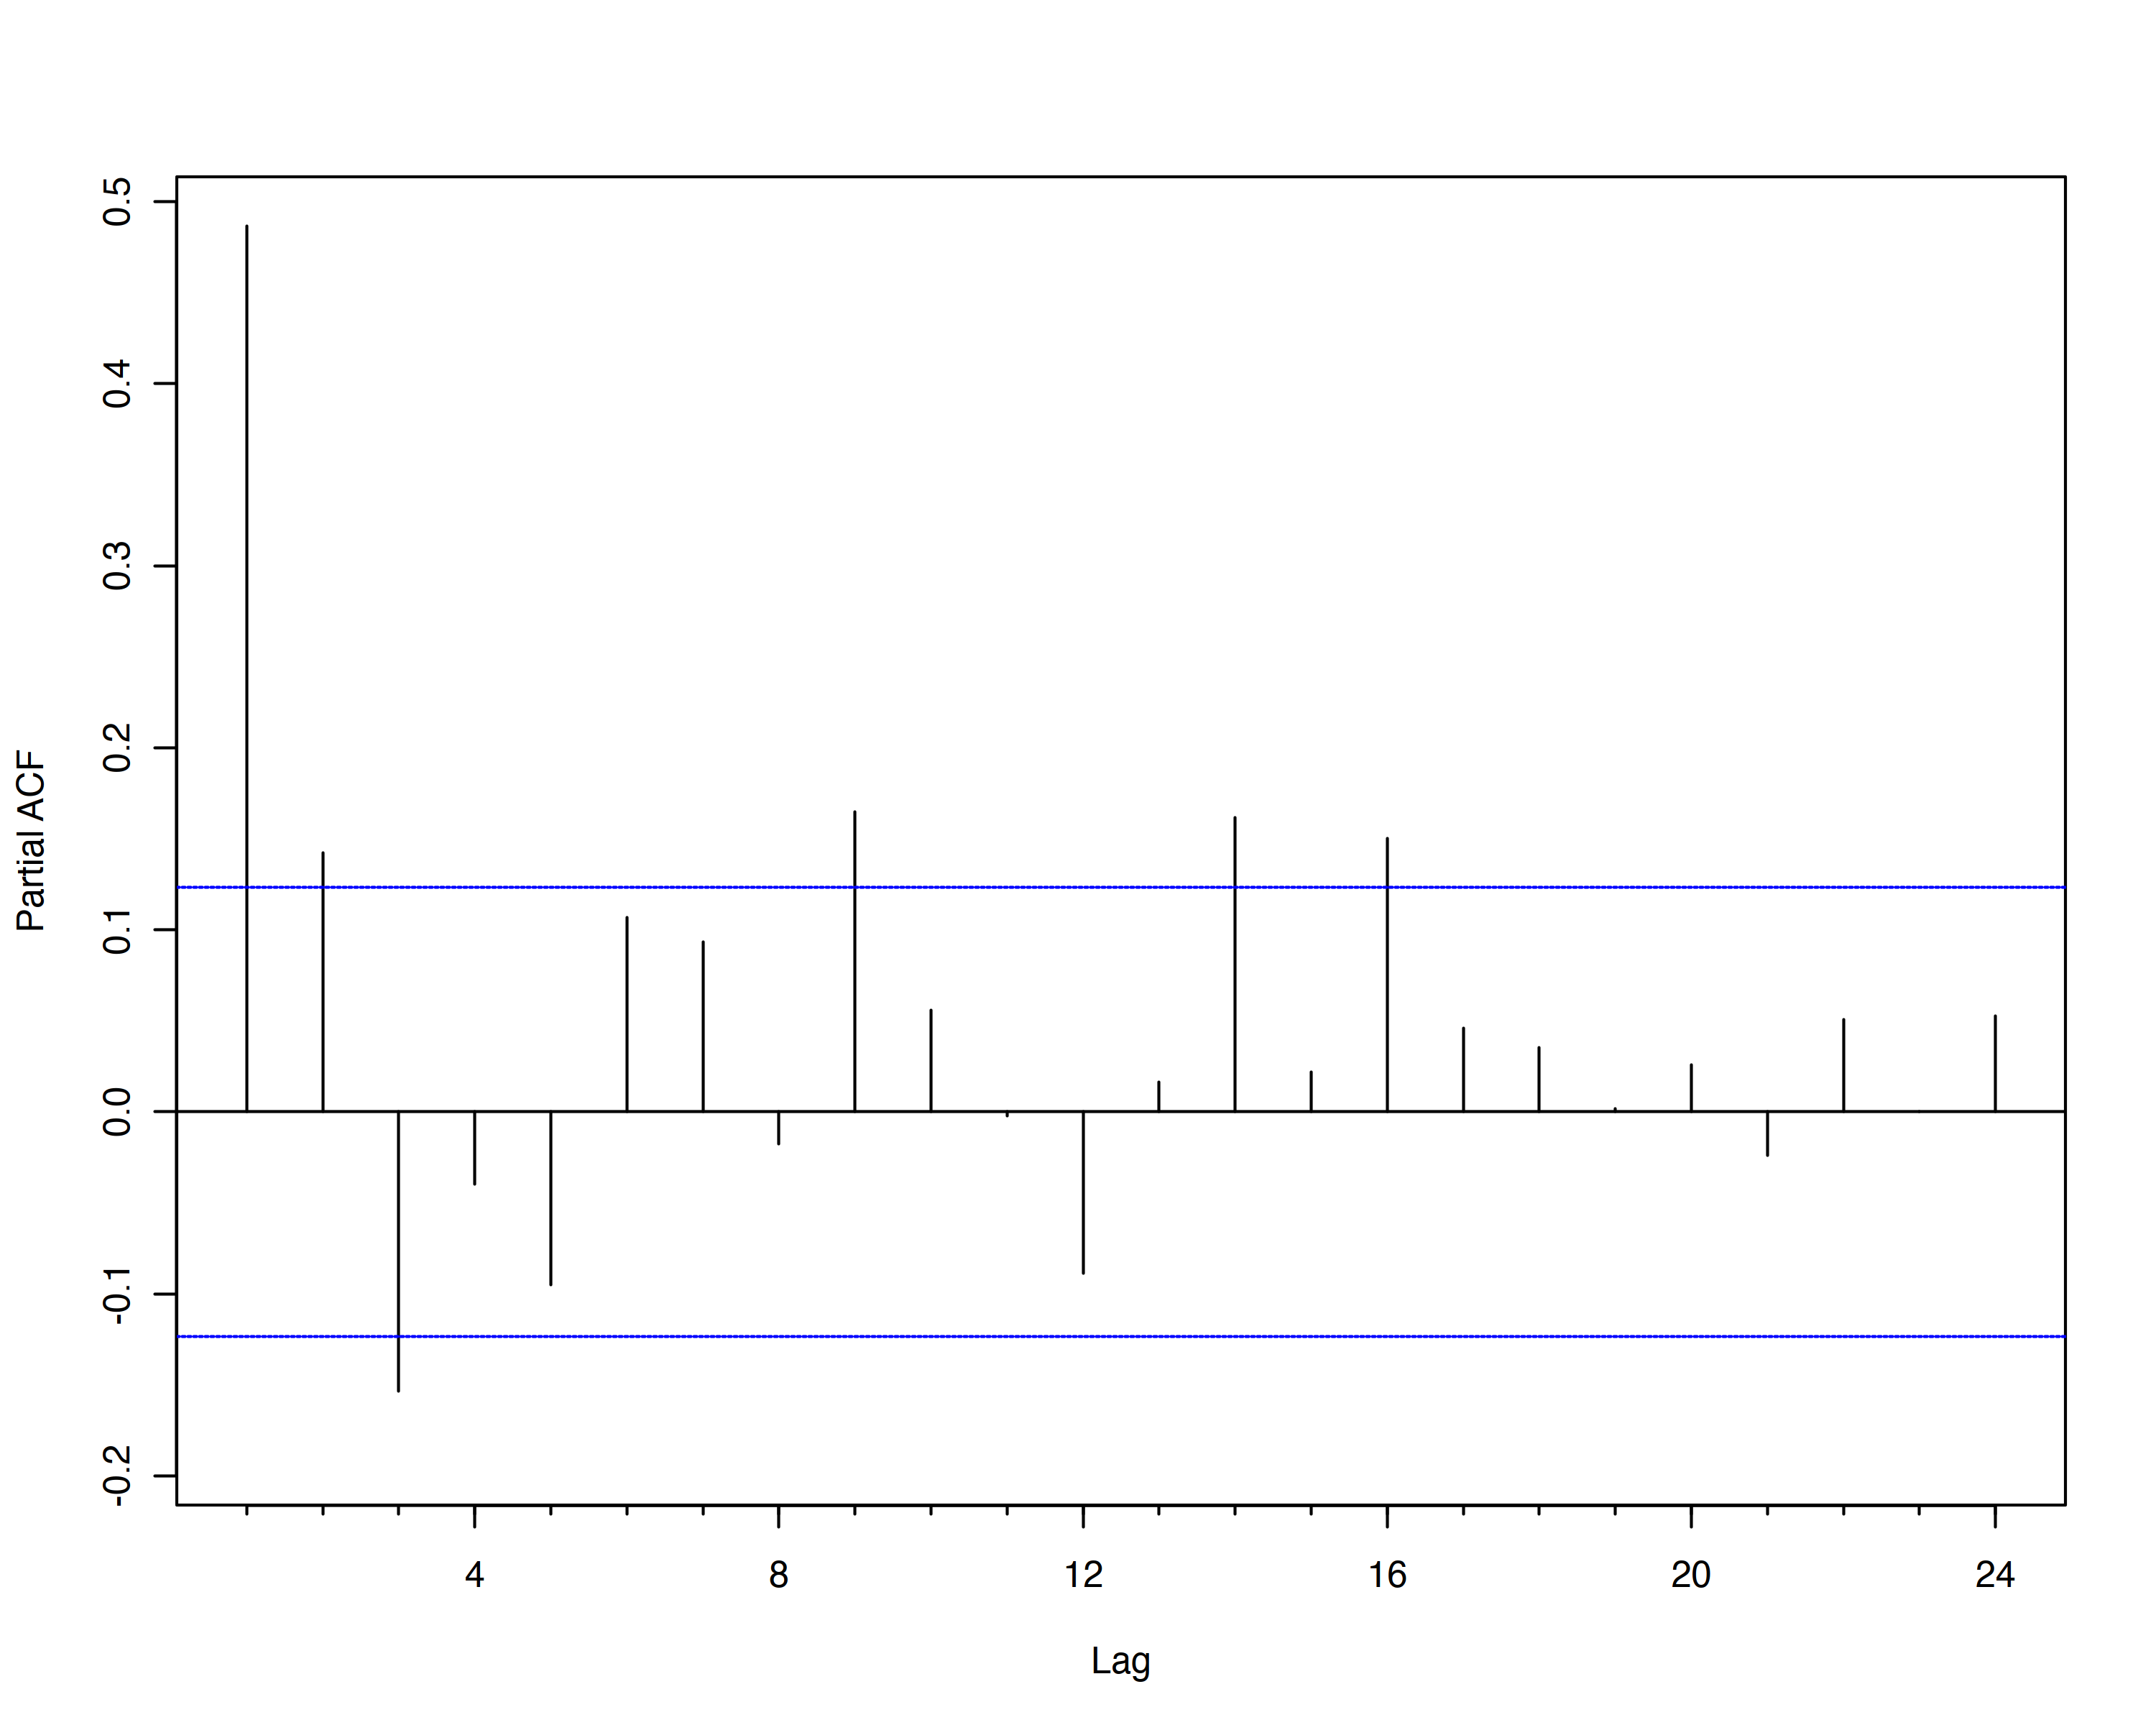

In [11]:
forecast::Pacf(dgnp, main = "")

In [12]:
ar(dgnp, method = "mle")

# Call:
# ar(x = dgnp, method = "mle")

# Coefficients:
#       1        2        3        4        5        6        7        8  
#  0.4318   0.1985  -0.1180   0.0189  -0.1607   0.0900   0.0615  -0.0814  
#       9  
#  0.1940  

# Order selected 9  sigma^2 estimated as  8.918e-05


Call:
ar(x = dgnp, method = "mle")

Coefficients:
      1        2        3        4        5        6        7        8  
 0.4318   0.1985  -0.1180   0.0189  -0.1607   0.0900   0.0615  -0.0814  
      9  
 0.1940  

Order selected 9  sigma^2 estimated as  8.918e-05

In [13]:
fUnitRoots::adfTest(
  gnp,
  lags = 9,
  type = "c"
)

# Title:
#  Augmented Dickey-Fuller Test

# Test Results:
#   PARAMETER:
#     Lag Order: 9
#   STATISTIC:
#     Dickey-Fuller: -1.8467
#   P VALUE:
#     0.3691 

# Description:
#  Thu Jul 24 15:04:07 2025 by user:


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 9
  STATISTIC:
    Dickey-Fuller: -1.8467
  P VALUE:
    0.3691 

Description:
 Thu Jul 24 15:57:18 2025 by user: 

In [14]:
fUnitRoots::adfTest(gnp, lags = 9, type = "ct")

# Title:
#  Augmented Dickey-Fuller Test

# Test Results:
#   PARAMETER:
#     Lag Order: 9
#   STATISTIC:
#     Dickey-Fuller: -0.0094
#   P VALUE:
#     0.99 

# Description:
#  Thu Jul 24 15:40:54 2025 by user:

Warning message in fUnitRoots::adfTest(gnp, lags = 9, type = "ct"):
"p-value greater than printed p-value"



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 9
  STATISTIC:
    Dickey-Fuller: -0.0094
  P VALUE:
    0.99 

Description:
 Thu Jul 24 15:57:18 2025 by user: 

In [15]:
tmp.t <- c(time(gnp))
tmp.y <- residuals(lm(c(gnp) ~ tmp.t))
fUnitRoots::adfTest(tmp.y, type = "nc")

# Title:
#  Augmented Dickey-Fuller Test

# Test Results:
#   PARAMETER:
#     Lag Order: 1
#   STATISTIC:
#     Dickey-Fuller: -0.0763
#   P VALUE:
#     0.592 

# Description:
#  Thu Jul 24 15:42:26 2025 by user:


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -0.0763
  P VALUE:
    0.592 

Description:
 Thu Jul 24 15:57:18 2025 by user: 

In [16]:
library(urca)

gnp_urdf <- ur.df(gnp, type = "drift", lags = 9)
summary(gnp_urdf)

# ############################################### 
# # Augmented Dickey-Fuller Test Unit Root Test # 
# ############################################### 

# Test regression drift 


# Call:
# lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

# Residuals:
#       Min        1Q    Median        3Q       Max 
# -0.033589 -0.004595  0.000503  0.003911  0.035557 

# Coefficients:
#               Estimate Std. Error t value Pr(>|t|)    
# (Intercept)  0.0135157  0.0045219   2.989  0.00310 ** 
# z.lag.1     -0.0009040  0.0004895  -1.847  0.06606 .  
# z.diff.lag1  0.3903745  0.0641690   6.084 4.81e-09 ***
# z.diff.lag2  0.2057039  0.0681595   3.018  0.00283 ** 
# z.diff.lag3 -0.1111342  0.0693754  -1.602  0.11053    
# z.diff.lag4  0.0263875  0.0692327   0.381  0.70345    
# z.diff.lag5 -0.1399063  0.0684739  -2.043  0.04216 *  
# z.diff.lag6  0.0857675  0.0704276   1.218  0.22453    
# z.diff.lag7  0.0520310  0.0696968   0.747  0.45610    
# z.diff.lag8 -0.0879122  0.0685969  -1.282  0.20127    
# z.diff.lag9  0.1816295  0.0639332   2.841  0.00490 ** 
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Residual standard error: 0.009396 on 232 degrees of freedom
# Multiple R-squared:  0.3142,	Adjusted R-squared:  0.2847 
# F-statistic: 10.63 on 10 and 232 DF,  p-value: 8.56e-15


# Value of test-statistic is: -1.8467 6.7291 

# Critical values for test statistics: 
#       1pct  5pct 10pct
# tau2 -3.44 -2.87 -2.57
# phi1  6.47  4.61  3.79


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033589 -0.004595  0.000503  0.003911  0.035557 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0135157  0.0045219   2.989  0.00310 ** 
z.lag.1     -0.0009040  0.0004895  -1.847  0.06606 .  
z.diff.lag1  0.3903745  0.0641690   6.084 4.81e-09 ***
z.diff.lag2  0.2057039  0.0681595   3.018  0.00283 ** 
z.diff.lag3 -0.1111342  0.0693754  -1.602  0.11053    
z.diff.lag4  0.0263875  0.0692327   0.381  0.70345    
z.diff.lag5 -0.1399063  0.0684739  -2.043  0.04216 *  
z.diff.lag6  0.0857675  0.0704276   1.218  0.22453    
z.diff.lag7  0.0520310  0.0696968   0.747  0.45610    
z.diff.lag8 -0.0879122  0.0685969  -1.282  0.20127    
z.diff.lag9  0.1816295  0.0639332   2.

In [17]:
tseries::adf.test(gnp, k = 9)

# Augmented Dickey-Fuller Test

# data:  gnp
# Dickey-Fuller = -0.0093764, Lag order = 9, p-value = 0.99
# alternative hypothesis: stationary

Warning message in tseries::adf.test(gnp, k = 9):
"p-value greater than printed p-value"



	Augmented Dickey-Fuller Test

data:  gnp
Dickey-Fuller = -0.0093764, Lag order = 9, p-value = 0.99
alternative hypothesis: stationary


In [18]:
forecast::ndiffs(gnp, test = "adf")

[1] 1

In [19]:
da <- read_table(
  "data/d-sp55008.txt",
  col_types = cols(.default = col_double())
)

library(tidyverse)
xts.sp5d <- xts(
  da[, -(1:3)],
  make_date(da$year, da$mon, da$day)
)

str(xts.sp5d)

# An xts object on 1950-01-03 / 2008-04-11 containing: 
#   Data:    double [14662, 6]
#   Columns: open, high, low, close, volume ... with 1 more column
#   Index:   Date [14662] (TZ: "UTC")

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v purrr     1.0.4
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::first()  masks xts::first()
x dplyr::lag()    masks stats::lag()
x dplyr::last()   masks xts::last()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


An xts object on 1950-01-03 / 2008-04-11 containing: 
  Data:    double [14662, 6]
  Columns: open, high, low, close, volume ... with 1 more column
  Index:   Date [14662] (TZ: "UTC")


In [20]:
sp5d <- log(xts.sp5d[, "close"])
delta.sp5d <- diff(as.numeric(sp5d))

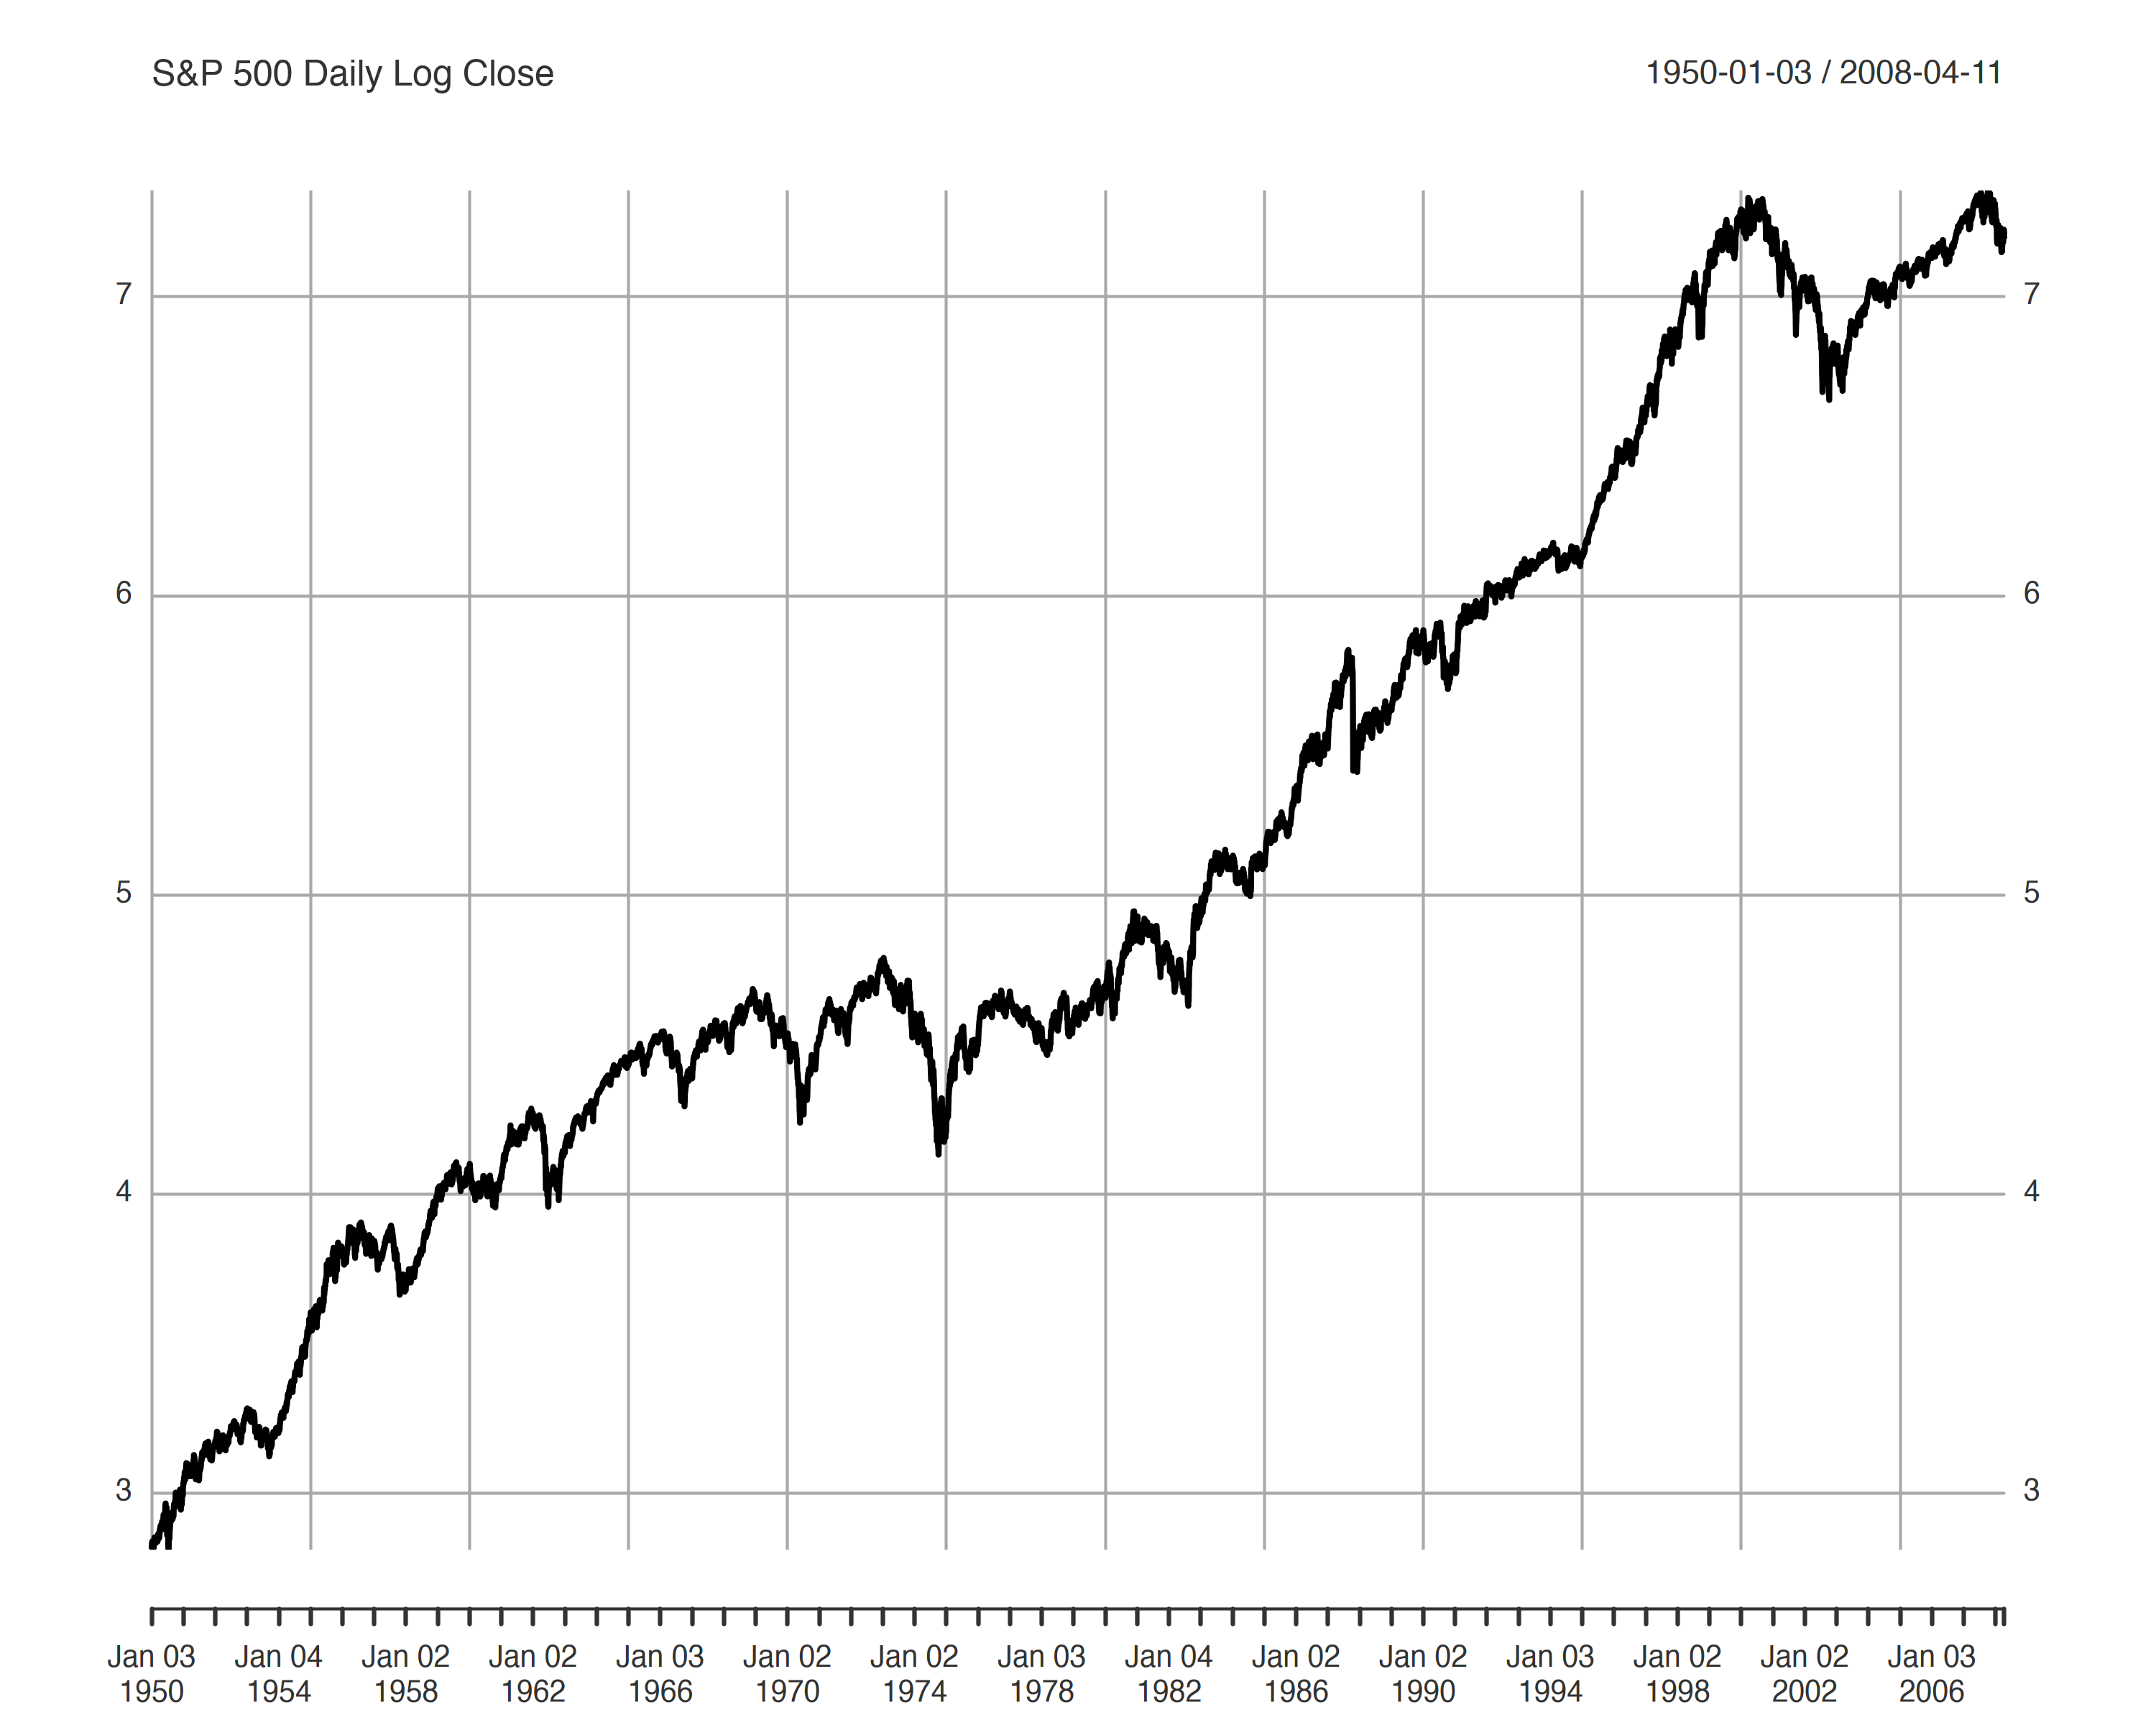

In [21]:
plot(
  sp5d,
  type = "l",
  main = "S&P 500 Daily Log Close",
  major.ticks = "years",
  minor.ticks = NULL,
  grid.ticks.on = "auto"
)

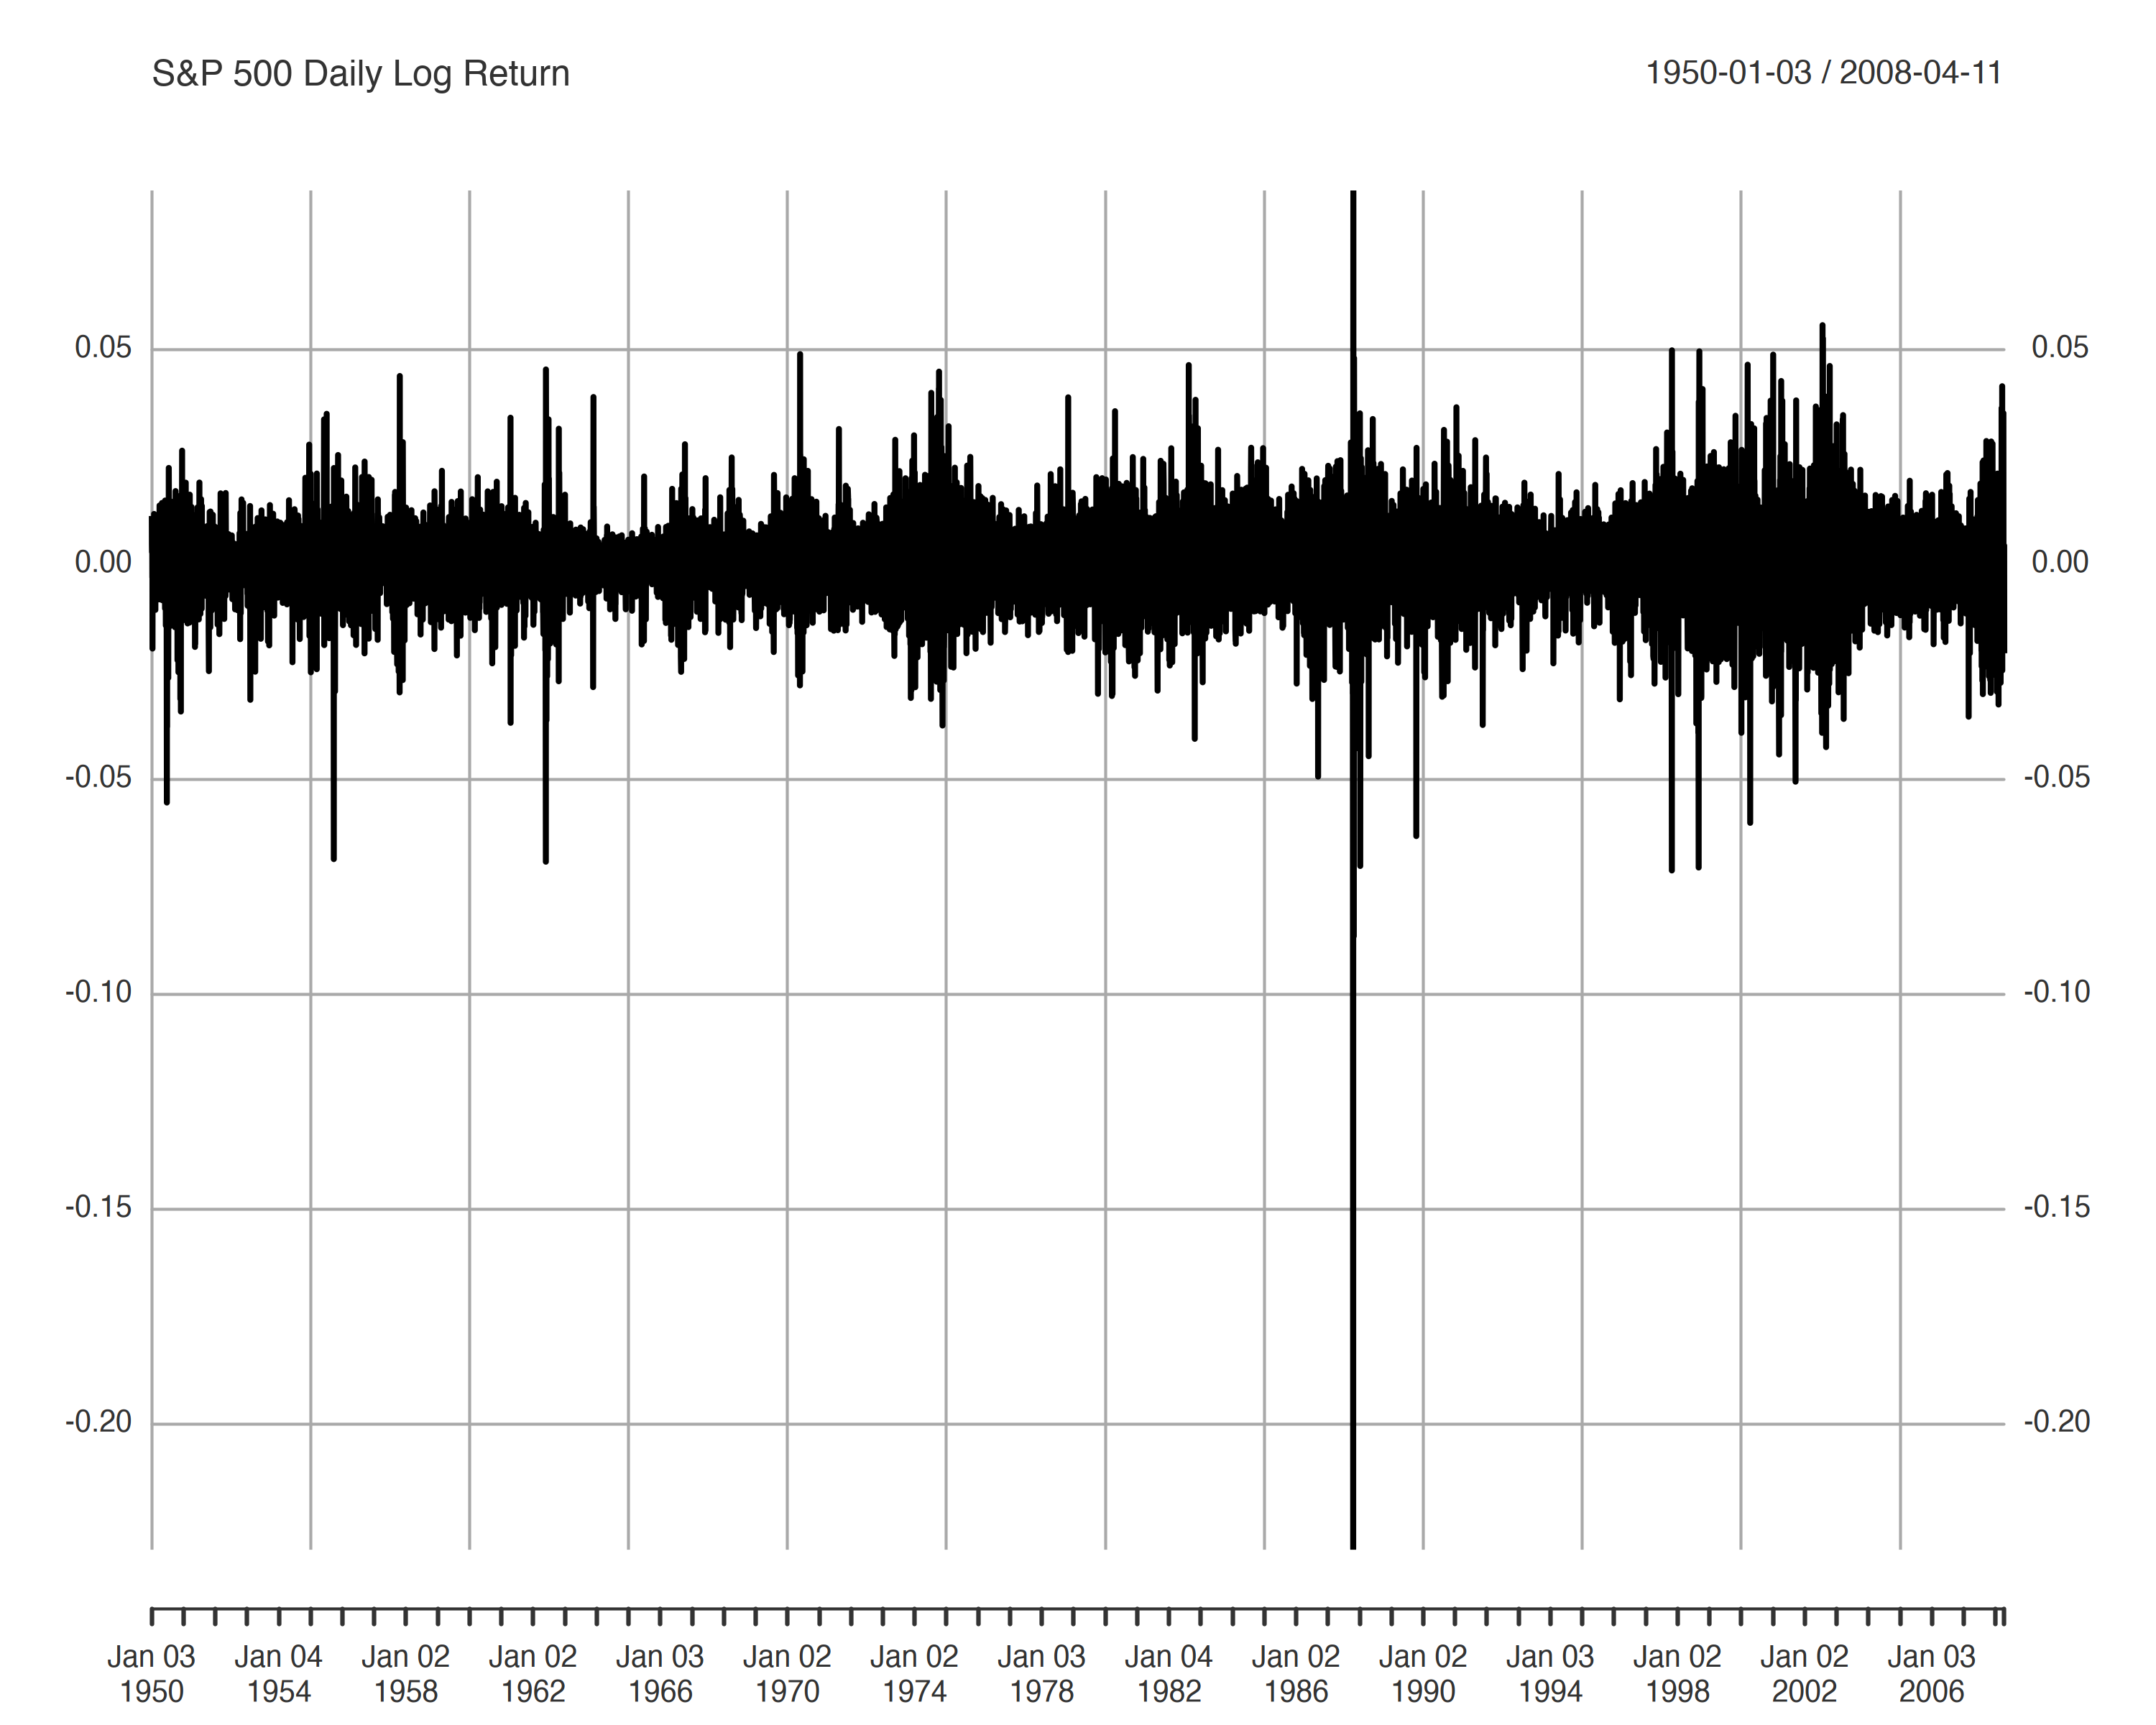

In [22]:
plot(
  diff(sp5d),
  type = "l",
  main = "S&P 500 Daily Log Return",
  major.ticks = "years",
  minor.ticks = NULL,
  grid.ticks.on = "auto"
)

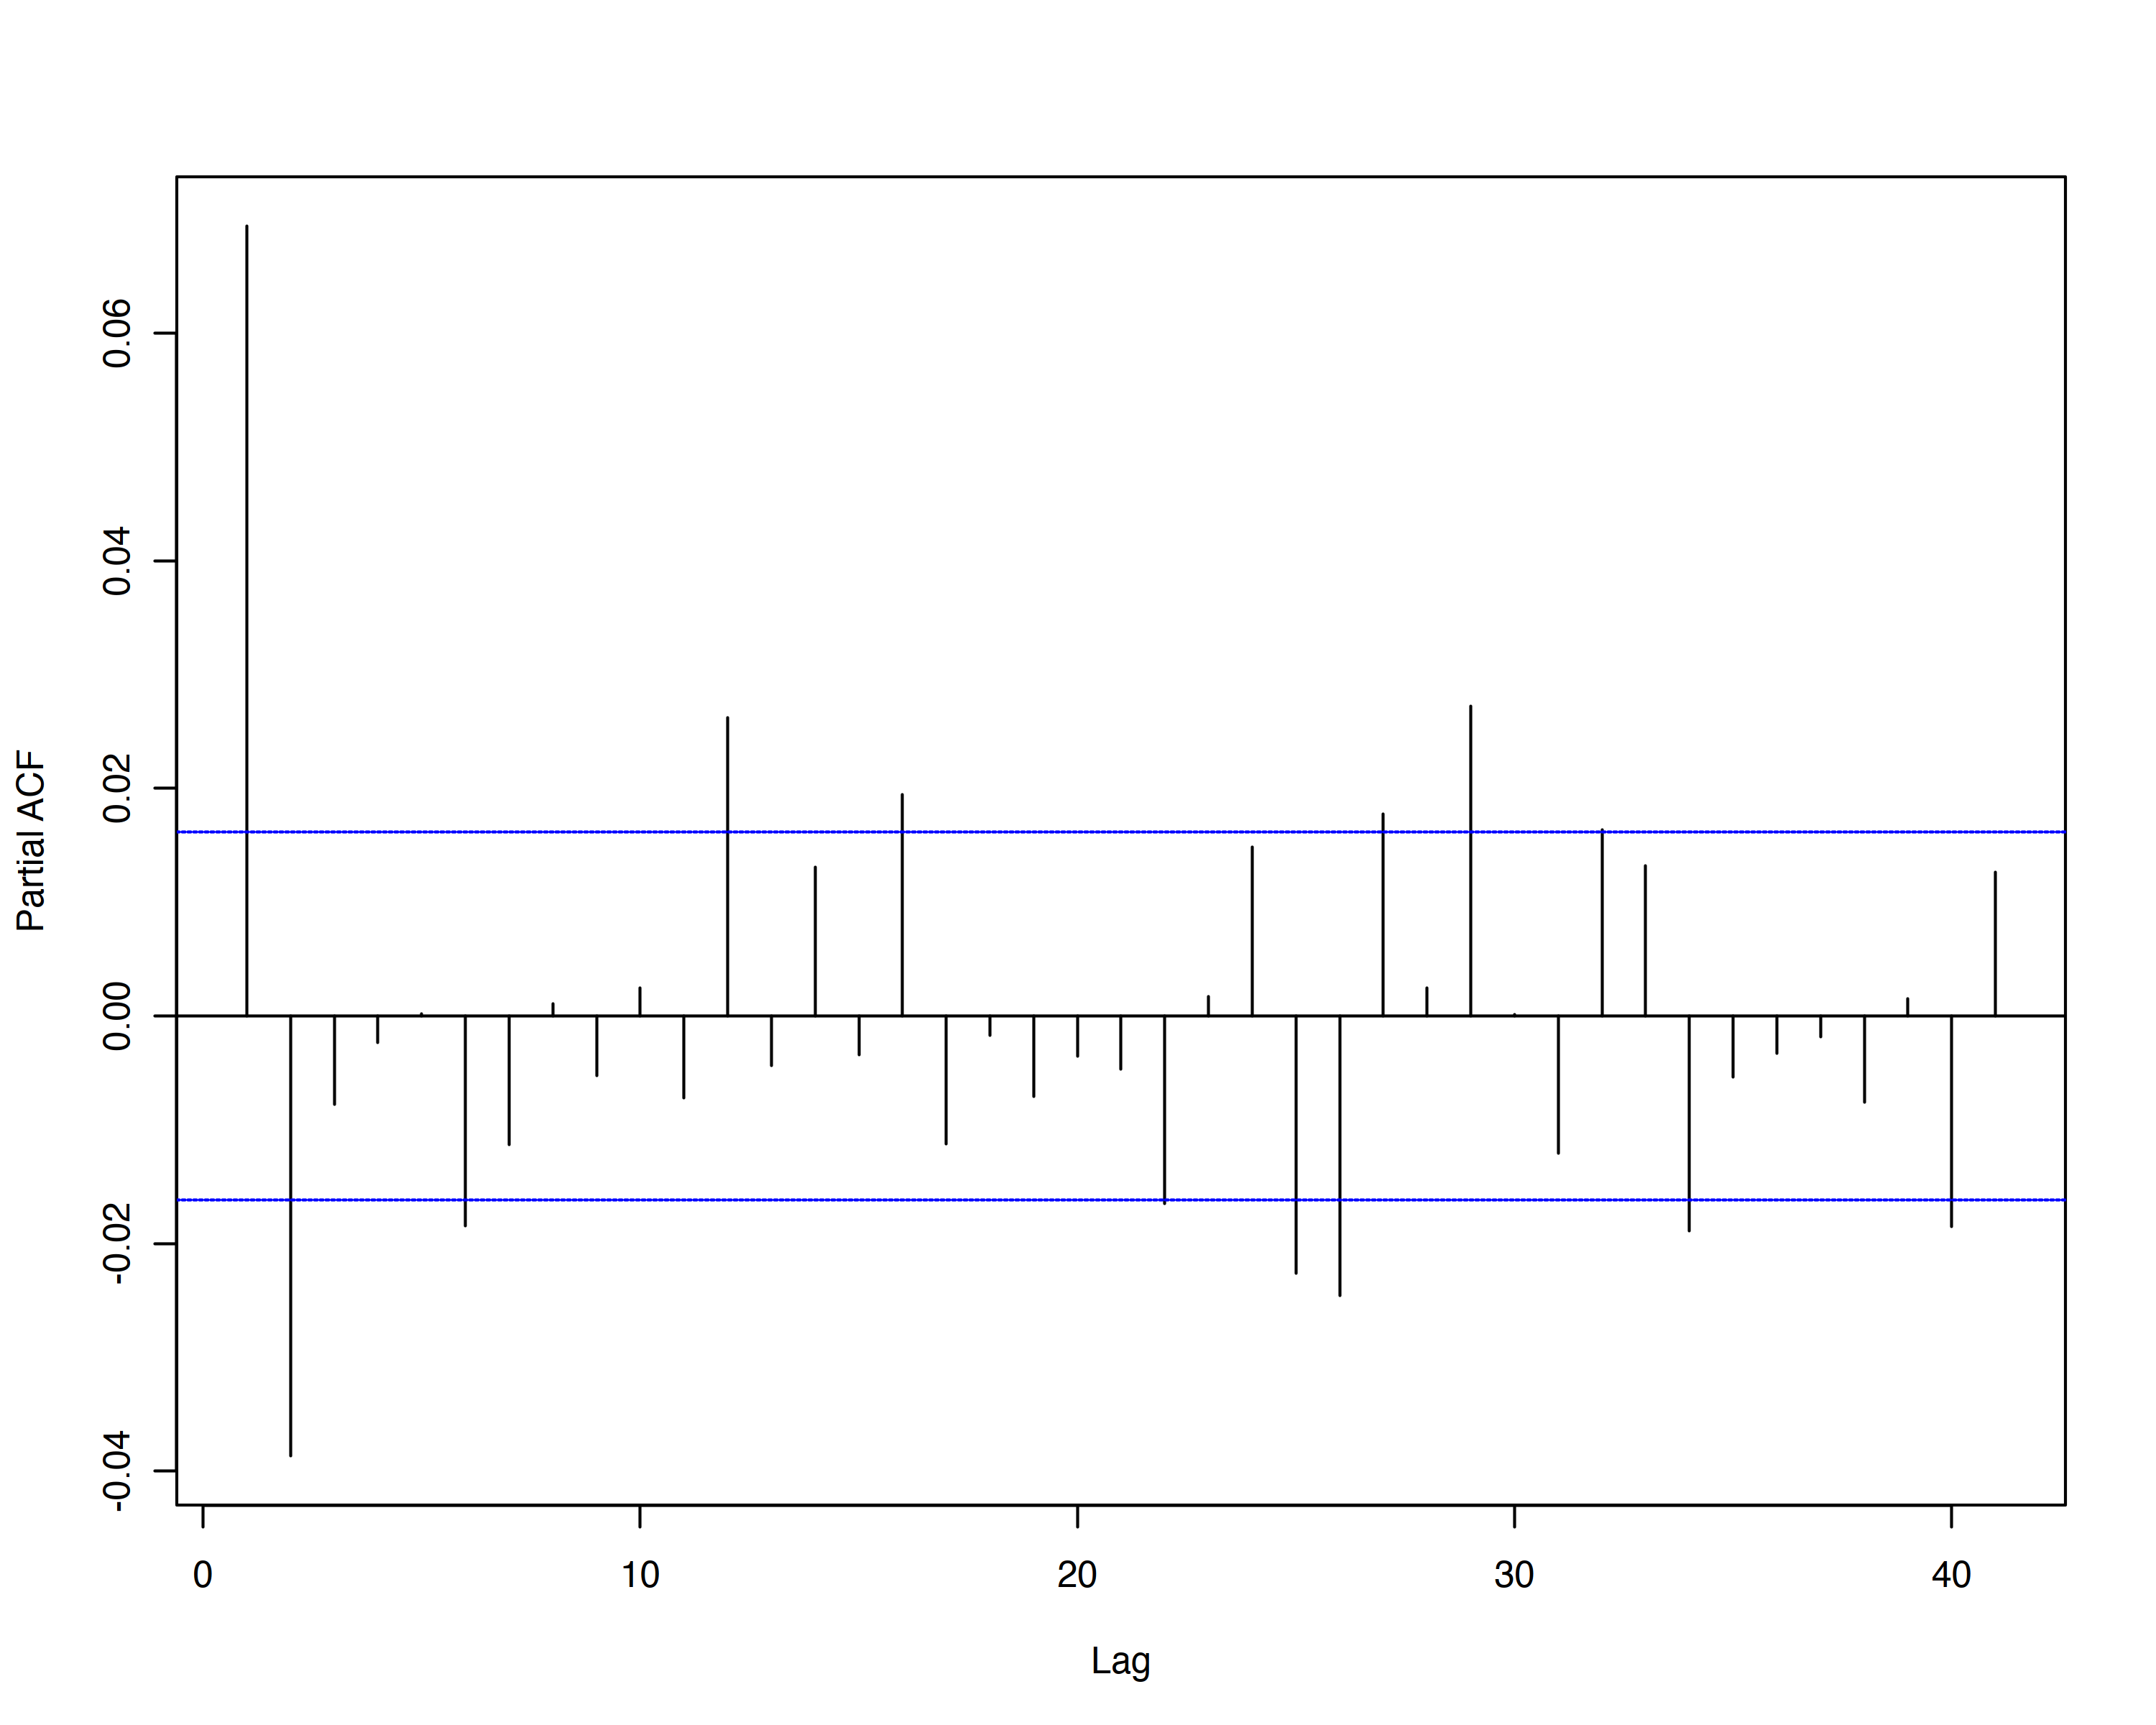

In [23]:
pacf(delta.sp5d, main = "")

In [24]:
ar(delta.sp5d, method = "mle")

# Call:
# ar(x = delta.sp5d, method = "mle")

# Coefficients:
#       1        2  
#  0.0721  -0.0387  

# Order selected 2  sigma^2 estimated as  8.068e-05


Call:
ar(x = delta.sp5d, method = "mle")

Coefficients:
      1        2  
 0.0721  -0.0387  

Order selected 2  sigma^2 estimated as  8.068e-05

In [25]:
fUnitRoots::adfTest(
  as.numeric(coredata(sp5d)),
  lags = 2,
  type = "ct"
)

# Title:
#  Augmented Dickey-Fuller Test

# Test Results:
#   PARAMETER:
#     Lag Order: 2
#   STATISTIC:
#     Dickey-Fuller: -2.0179
#   P VALUE:
#     0.5708 

# Description:
#  Thu Jul 24 15:56:13 2025 by user:


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -2.0179
  P VALUE:
    0.5708 

Description:
 Thu Jul 24 15:57:20 2025 by user: 

In [ ]:
fUnitRoots::adfTest(
  delta.sp5d,
  lags = 2,
  type = "ct"
)

# Title:
#  Augmented Dickey-Fuller Test

# Test Results:
#   PARAMETER:
#     Lag Order: 2
#   STATISTIC:
#     Dickey-Fuller: -70.5501
#   P VALUE:
#     0.01 

# Description:
#  Thu Jul 24 15:57:20 2025 by user:

Warning message in fUnitRoots::adfTest(delta.sp5d, lags = 2, type = "ct"):
"p-value smaller than printed p-value"



Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -70.5501
  P VALUE:
    0.01 

Description:
 Thu Jul 24 15:57:20 2025 by user: 